Aulas 2 e 3 - Coleta, Organização, Limpeza e Imputação de Dados
===============================================================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Aluno: Edgar Rolland Chiw Lau   
Email: dgarzao@gmail.com

Antes de começar:
 - Caso seu ambiente Anaconda não possua uma das dependências necessárias para a execução do código contigo neste notebook, abra uma célula e execute o comando: ```!pip install -r ../requirements.txt```

Neste módulo vamos aprender sobre:
 1. **Como carregar dados de diferentes formatos em memória no nosso ambiente de desenvolvimento;**
 2. **Análise Exploratória;**
 3. **Tratamento de Dados;**
 4. **Imputação de dados;**
 5. **Normalização e estandardização de variáveis contínuas;**

1 - Carregando dados no ambiente de desenvolvimento
=============================================

No dia a dia de trabalho, um **Cientista de Dados** se depara com diferentes tipos fontes de dados. Nem sempre, em sua equipe, haverá um **Engenheiro de Dados** disponível para te ajudar a coletar dados de interesse em um formato fácil de integração com seu ambiente de desenvolvimento Python (ou qualquer outro ambiente de desenvolvimento científico), no nosso caso, o Jupyter Notebook. Portanto, é fundamental que você domine os principais formatos e/ou fontes existentes no mercado, para que não dependa de um terceiro para uma rápida prototipação/experimentação.

As principais fontes de dados, encontradas por um profissional da área, são:
 - Arquivos .csv;
 - Arquivos .json;
 - Arquivos .parquet;
 - Base de dados relacional SQL;
 - Base de dados não relacional NoSQL;

Em empresas que seguem a filosofia **Data Driven** haverá, usualmente, uma pedaço de Software chamado de *Camada de Ingestão de Dados*. Esta camada, desenvolvida por **Engenheiros de Dados**, tem por objetivo centralizar diversas fontes de informação bruta (arquivos csv, json, parquet, imagens, audios, etc ...) em um único repositório (ou **Buckets**). Este repositório centralizado recebe o nome de **Data Lake**, e é o ponto de partida para processos de ETL (*Extract, Transform and Load*), e também a forma mais fácil de um **Cientista de Dados** se servir de dados.

A consulta à base de dados SQL/NoSQL está fora do escopo deste módulo, contudo, com o domínio da linguagem Python para o processamento dos principais tipos de arquivo citados acima, . Tampouco trabalharemos, neste módulo, com processamento de imagens/audio.

In [101]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import seaborn as sns

import pylab 
import scipy.stats as stats

import statsmodels.api as sm


1.1 - Arquivo .csv
----------------------

A existência de arquivos *csv* em **Data Lakes** não é predominante, pois, apesar de ser um arquivo fácil de se manipular, não é o mais eficiente (redução de espaço em disco e otimização de tempo de leitura). Entretanto, é o tipo de arquivo mais encontrado quando a informação ainda não está disponível no **Data Lake** (exportação de planilhas Excel, base de dados do IBGE, entre outras).

O arquivo csv é o melhor amigo do Pandas. Para carregar um arquivo em memória, utilizamos a função `read_csv`

```
dataset = pd.read_csv("caminho/do/arquivo.csv")
```

In [102]:
dados_csv = pd.read_csv("dados_brutos.csv")
dados_csv.head()

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4  \
0  RJ  Tipo 1   Localidade 4  0.620648   9.967806  4.990882  25.124844   
1  SP  Tipo 2   Localidade 4  0.817642  12.629695  5.466835  23.444343   
2  RJ  Tipo 2   Localidade 3  0.793080  11.292156  4.201919  28.230731   
3  SC  Tipo 1   Localidade 4  0.792435  11.563047  5.459777  22.414837   
4  RN  Tipo 1   Localidade 3  0.711696  11.655785  4.891314  25.451251   

      loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima  \
0  0.081382  0.727021           3603.941384            2002.686030   
1  0.367980  0.145812           2185.209139             683.811862   
2  0.332654  0.432904           1025.698339             957.451552   
3  0.159663  0.884596                   NaN            3723.067390   
4  0.156154  0.836320           3925.306331             705.807343   

   escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area  \
0          1124.043113            0.0             0.0           NaN  123.0   
1          2462.825432            0.0             0.0          13.0  143.0   
2          1049.112117            0.0             0.0          12.0  150.0   
3          1296.121182            0.0             0.0           8.0  160.0   
4          4178.062758            0.0             0.0          12.0  134.0   

     preco  
0  1348017  
1   926601  
2  1627474  
3  1201041  
4  1444848

1.2 - Arquivo .json
------------------------

É o formato mais utilizado por **Engenheiros de Software**, devido à sua compatibilidade com as tecnologias de desenvolvimento de APIs da atualidade. Consequentemente, a quantidade de arquivos *json* em **Data Lakes** é volumosa.

No *Pandas*, importa-se um arquivo *json* utilizando o comando `read_json`

In [103]:
dados_json = pd.read_json("dados_brutos.json")
dados_json.head()

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4  \
700  ES  Tipo 1           None  0.638824  10.158127  4.874347  26.151255   
701  SP  Tipo 2   Localidade 4  0.794100  11.467263  4.889458  25.737262   
702  MS  Tipo 1   Localidade 4  0.745027  11.088365  4.644014  26.165747   
703  PR  Tipo 1   Localidade 1  0.773947  12.182951  5.778339  21.948647   
704  RO  Tipo 2   Localidade 1  0.686853  10.321383  4.589251  27.254870   

        loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima  \
700  0.632733  0.481356            341.680530            3456.862812   
701  0.290362  0.649488           3121.658324            2711.257761   
702  0.117298  0.131615           1808.463617            1178.930223   
703  0.521053  0.021927           4189.517081            6402.599591   
704  0.985792  0.744716            385.176751            1630.761705   

     escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area  \
700          2557.124996            0.0             0.0          37.0    NaN   
701          2635.042549            0.0             0.0           4.0  151.0   
702          1231.387072            0.0             NaN          15.0  170.0   
703          1738.502238            0.0             0.0           8.0   84.0   
704          3446.457453            0.0             0.0          20.0  168.0   

       preco  
700  1329074  
701   980660  
702  1044861  
703  1347838  
704   751177

1.3 - Arquivo .parquet
-------------------------------

É um formato de armazenamento colunar, disponível em todos os projetos do ecossistema *Hadoop*.
Em suma, um arquivo *parquet* permite armazenar e consultar o arquivo de forma eficiênte, o que justifica seu emprego na construção de **Data Lakes**.

https://parquet.apache.org/

A API do *Pandas* é intuitiva! Para carregar um arquivo *parquet*, utilizamos o método `pd.read_parquet` 

In [104]:
dados_parquet = pd.read_parquet("dados_brutos.parquet")
dados_parquet.head()

uf    tipo cod_localidade    feat_1     feat_2    feat_3     feat_4  \
0  DF  Tipo 1   Localidade 1  0.865418  12.469136  4.428843  28.599545   
1  SC  Tipo 1   Localidade 2  0.794821  11.643225  5.745631  20.793361   
2  MG  Tipo 2   Localidade 1  0.765382  11.246786  4.435433  27.697589   
3  SP  Tipo 2   Localidade 1  0.742807  10.807940  4.510181  28.549110   
4  DF  Tipo 1   Localidade 4  0.708509  10.182098  5.581803  22.486957   

      loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima  \
0  0.039081  0.967402           6424.017248            2312.613264   
1  0.163092  0.150923           1390.553671            7062.080907   
2  0.519452  0.083601                   NaN            5795.794123   
3  0.094447  0.229071           2811.748941            5112.857979   
4  0.398567  0.594843           3362.149025            1685.887551   

   escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area  \
0           922.096367            0.0             0.0           9.0   60.0   
1          6311.945099            0.0             0.0           6.0  135.0   
2          1406.914318            0.0             0.0          17.0  162.0   
3          1954.494335            1.0             0.0           3.0  105.0   
4          1600.735664            0.0             0.0           5.0  137.0   

     preco  
0  1283960  
1   691992  
2  1042605  
3  1132298  
4  1133084

1.4 - Exercício
---------------

Os dados da aula de hoje foram divididos em três arquivos, os quais carregamos nas células anteriores. Pesquise na documentação do *Pandas* como unir as linhas dos *dataframes* `dados_csv`, `dados_json` e `dados_parquet`, e um novo *dataframe* nominado `dados`.

https://pandas.pydata.org/docs/reference/index.html#api

Dica: **Concatenar** é a palavra chave de pesquisa

In [105]:
# Substitua a igualdade abaixo por uma que empilhe as linhas dos três conjuntos de 
# dados que carregamos anteriormente em apenas um conjunto de dados denominado `dados`
#dados = dados_csv.copy()
dados = pd.concat([dados_csv, dados_json, dados_parquet]).reset_index(drop=True)

2 - Análise exploratória
===================

Agora que carregamos os dados no *notebook*, precisamos explorá-los para encontrar eventuais inconsistências.
No dia a dia de trabalho de um *Cientista de Dados*, é muito comum encontrar:
 - Campos nulos (NaN);
 - Variáveis nominais não padronizadas (ex: "MAÇA", "maça", "MACA", "Maca ");
 - Variáveis contínuas (intervalar ou de razão) fora de escala;
 - Preenchimento incorreto de campos (ex: Espera-se nome da fruta, mas campo foi preenchido com o nome da cor);
 
Dentre as etapas do processo de **Mineração de Dados**, a *limpeza* do conjunto de dados é a que despende maior tempo, e que tem papel chave quanto ao sucesso do projeto. Por quê? Como veremos adiante, alguns algoritmos de *Aprendizado de Máquina* são gulosos, ou seja, encontrarão uma resposta até mesmo para os ruídos presentes no seu conjunto de treinamento (conceito de *Overfitting*).

Vamos começar identificando que variáveis existem no conjunto, e seus respectivos tipos, utilizando os comandos:
  - `dtypes`: para verificar o tipo de cada coluna;
  - `sample(N)`: para coletar uma pequena amostra que pode nos ajudar a sanar dúvidas sobre os tipos;

In [106]:
dados.dtypes

uf                        object
tipo                      object
cod_localidade            object
feat_1                   float64
feat_2                   float64
feat_3                   float64
feat_4                   float64
loc_x                    float64
loc_y                    float64
mercado_mais_proximo     float64
farmacia_mais_proxima    float64
escola_mais_proxima      float64
num_penit_4km            float64
num_penit_500m           float64
idade_imovel             float64
area                     float64
preco                      int64
dtype: object

In [107]:
dados.sample(5).T

1876          1409          1463          552   \
uf                               AL            RJ            AP            SP   
tipo                         Tipo 2        Tipo 2        Tipo 1        Tipo 2   
cod_localidade         Localidade 4  Localidade 1  Localidade 1  Localidade 1   
feat_1                     0.792741      0.761489      0.882891      0.680444   
feat_2                    12.216082     11.487373     14.049813      9.717978   
feat_3                     5.020353      4.606964      5.301663       5.72539   
feat_4                    24.150387     26.217852     23.430506     21.696391   
loc_x                      0.645214      0.158998      0.329443       0.13242   
loc_y                      0.500694      0.804308      0.881981      0.026013   
mercado_mais_proximo    3936.126625   4444.418413           NaN   4126.858649   
farmacia_mais_proxima   1448.844911   1456.083559           NaN   6765.331668   
escola_mais_proxima      684.431482   1210.484216    2156.45603    797.157348   
num_penit_4km                   0.0           0.0           0.0           1.0   
num_penit_500m                  0.0           0.0           0.0           0.0   
idade_imovel                   14.0          14.0          35.0          10.0   
area                          147.0          74.0         172.0         222.0   
preco                        531869       1141438        677281       1053109   

                               1772  
uf                               SC  
tipo                         Tipo 1  
cod_localidade         Localidade 2  
feat_1                     0.713106  
feat_2                     5.814884  
feat_3                     5.629968  
feat_4                    21.633565  
loc_x                      0.720776  
loc_y                      0.847234  
mercado_mais_proximo    3513.581269  
farmacia_mais_proxima   2185.426373  
escola_mais_proxima     2688.848359  
num_penit_4km                   1.0  
num_penit_500m                  0.0  
idade_imovel                    2.0  
area                          124.0  
preco                        706072

Nosso conjunto de dados representa uma base imobiliária, e é formado pelas seguintes colunas:

| Nome                  | Descrição                                                             | Tipo               |
| ------------------    | ------------------------------------------------------                | ------------------ |
| uf                    | O estado onde o imóvel está localizado                                | object (string)    |
| tipo                  | O tipo do imóvel                                                      | object (string)    |
| cod_localidade        | Código qualitativo da localidade do imóvel (Consultoria)              | object (string)    |
| feat_1                | Feature 1 (Consultoria)                                               | float64            |
| feat_2                | Feature 2 (Consultoria)                                               | float64            |
| feat_3                | Feature 3 (Consultoria)                                               | float64            |
| feat_4                | Feature 4 (Consultoria)                                               | float64            |
| loc_x                 | Coordenada x do imóvel em um mapa local de referência (Consultoria)   | float64            |
| loc_y                 | Coordenada y do imóvel em um mapa local de referência (Consultoria)   | float64            |
| mercado_mais_proximo  | Distância do mercado mais próximo, em metros                          | float64            |
| farmacia_mais_proxima | Distância da farmácia mais próxima, em metros                         | float64            |
| escola_mais_proxima   | Distância da escola mais próxima, em metros                           | float64            |
| num_penit_4km         | Número de penitenciárias em um raio de 4km do imóvel                  | int64              |
| num_penit_500m        | Número de penitenciárias em um raio de 500m do imóvel                 | int64              |
| idade_imovel          | Idade do imóvel                                                       | int64              |
| area                  | Área do imóvel, em $m^2$                                              | float64            |
| preco                 | O preço do imóvel, em R$                                              | int64              |

* O tipo `int64`, no *Python*, representa o conjunto dos números naturais $\mathbb{N}$
* O tipo `float64`, no *Python*, representa o conjunto dos números reais $\mathbb{R}$
* O tipo `object`, no *Python*, pode representar uma **string** ou uma estrutura de dados composta (`list`, `dict`, classes customizadas, entre outras)

As variáveis `cod_localidade`, `feat_1`, `feat_2`, `feat_3`, `feat_4`, `loc_x` e `loc_y` foram elaboradas por um time de consultoria externa especializada em avaliação imobiliária. Sabemos que os códigos de qualidade contidos na coluna `cod_localidade` são utilizados para segmentar subregiões em níveis de qualidade, contudo, não sabemos se as categorias podem ser interpretadas como variáveis ordinais. Quanto às variáveis numéricas intervalares (`feat_1` à `feat_4`), sabe-se apenas que foram construídas com base em laudos históricos de avaliação de imóveis próximos, e com base em indicadores macro-econômicos.

Não existe uma receita de bolo exata para tratamento de dados, uma vez que a natureza e as regras de negócio variam muito de problema à problema. Para este caso de estudo, vamos começar verificando o conteúdo das variáveis de tipo `object` (assumindo como premissa de que são categoricas). Como já sabemos que estes campos estão armazenando valores do tipo `string`, uma boa pergunta inicial seria: Quais os possíveis valores destes campo?

Para responder a esta pergunta, podemos utilizar a função `unique`:

In [108]:
# Valores únicos de UF (incluíndo valores nulos, i.e., NaN)
dados.uf.unique()

array(['RJ', 'SP', 'SC', 'RN', 'CE', 'MG', 'ES', 'RO', 'DF', 'MS', 'PR',
       'GO', 'AC', 'BA', 'MT', 'AL', 'RS', 'PB', 'TO', 'AM', 'AP', 'SE',
       'RR', 'PI', 'MA', 'PE', 'PA', nan, None], dtype=object)

In [109]:
# Valores únicos de tipo
dados.tipo.unique()

array(['Tipo 1', 'Tipo 2', 'TIPO 1', 'tipo 2', nan, 'TIPO 2',
       'LOCALIDADE 6', 'Localidade 9', 'Localidade 8', 'tipo 1',
       'Localidade 6', 'Tipo 3', 'Tipo 4', None, 'Localidade 10',
       'Localidade 5', 'TIPO 4', 'tipo 3', 'Localidade 7'], dtype=object)

In [110]:
# Valores únicos de localidade
dados.cod_localidade.unique()

array(['Localidade 4', 'Localidade 3', 'localidade 4', 'Localidade 2',
       'Localidade 9', 'Localidade 1', 'Localidade 7', 'localidade 3',
       'LOCALIDADE 2', 'localidade 1', 'LOCALIDADE 1', nan,
       'Localidade 8', 'Tipo 3', 'localidade 2', 'LOCALIDADE 3',
       'localidade 9', 'LOCALIDADE 4', 'Tipo 2', 'Localidade 5',
       'Localidade 6', None, 'localidade 5', 'Tipo 4', 'Localidade 10',
       'tipo 4', 'localidade 7'], dtype=object)

In [111]:
dados.describe().T

count           mean            std            min  \
feat_1                 2022.0       0.751808       0.103431       0.222897   
feat_2                 2022.0      11.304705       1.654269       3.067246   
feat_3                 2016.0       5.004588       0.514403       3.214858   
feat_4                 2023.0      24.978204       2.627059      15.850045   
loc_x                  2020.0       0.505169       0.288890       0.000530   
loc_y                  2023.0       0.501737       0.286487       0.000855   
mercado_mais_proximo   1953.0    3086.351775    1714.499709      37.932408   
farmacia_mais_proxima  1966.0    2675.509079    1538.196595      49.678746   
escola_mais_proxima    1964.0    2429.899456    1318.803468      63.839485   
num_penit_4km          2017.0       0.302925       0.468191       0.000000   
num_penit_500m         2025.0       0.007901       0.088559       0.000000   
idade_imovel           2022.0      15.410979      12.595984       0.000000   
area                   1968.0     124.730691      40.153210      51.000000   
preco                  2027.0  989262.435619  290317.635521  257922.000000   

                                 25%            50%           75%  \
feat_1                      0.684783       0.754352  8.201856e-01   
feat_2                     10.239090      11.362082  1.238432e+01   
feat_3                      4.655714       4.999201  5.347276e+00   
feat_4                     23.158389      25.002898  2.680118e+01   
loc_x                       0.250194       0.508069  7.473581e-01   
loc_y                       0.254863       0.510660  7.463950e-01   
mercado_mais_proximo     1794.086282    2816.375170  4.090446e+03   
farmacia_mais_proxima    1476.145321    2397.733125  3.622657e+03   
escola_mais_proxima      1432.287866    2240.663181  3.273253e+03   
num_penit_4km               0.000000       0.000000  1.000000e+00   
num_penit_500m              0.000000       0.000000  0.000000e+00   
idade_imovel                6.000000      11.000000  2.100000e+01   
area                       94.000000     120.000000  1.540000e+02   
preco                  797689.000000  964698.000000  1.163877e+06   

                                max  
feat_1                 1.277357e+00  
feat_2                 1.870217e+01  
feat_3                 6.638993e+00  
feat_4                 3.349520e+01  
loc_x                  9.997262e-01  
loc_y                  9.995796e-01  
mercado_mais_proximo   9.733443e+03  
farmacia_mais_proxima  8.063493e+03  
escola_mais_proxima    7.336996e+03  
num_penit_4km          2.000000e+00  
num_penit_500m         1.000000e+00  
idade_imovel           5.000000e+01  
area                   2.460000e+02  
preco                  2.140795e+06

**O que é quantil/percentil/quartil?**

Quantils são pontos estabelecidos em intervalos regulares em uma lista ordenada que informa o percentual de dados abaixo de um limiar em uma amostra.

Exemplo de cálculo de quantil:

Dada uma lista de valores desordenados $[5, 3, 1, 10, 4]$ o quantil nos diz o número índice da lista no qual $x$% da população (elementos da lista) são menores do que o valor apontado pelo índice. Por exemplo, se ordenarmos a lista de forma crescente, obtemos $[1, 3, 4, 5, 10]$.

Para calcular o quantil 0.5 (equivalente a mediana, e também ao segundo quartil), basta encontrar o índice central da lista. Nesta caso, a lista contém 5 elementos, sendo o índice 3 seu elemento central. Logo, nosso $q_{0.5} = 4$, significando que 50% dos dados de nossa amostra são menores que 4.

Equivalências:

| Quantil | Quartil | Percentil |
| ------- | ------- | --------- |
| 0.25    | 1       | 25%       |
| 0.5     | 2       | 50%       |
| 0.75    | 3       | 75%       |

A combinação de quantils com outras propriedades de uma amostra (como a média, valor mínimo, máximo e variância) nos fornece uma visão precisa da distribuição dos dados sob observação. Com o auxílio da biblioteca `seaborn`, podemos criar representação pictóricas destas informações, como no caso do Diagrama de Caixas (`boxplot`) e o Diagrama Violino (`violinplot`) apresentado abaixo: 


c:\Users\pm12789\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
c:\Users\pm12789\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


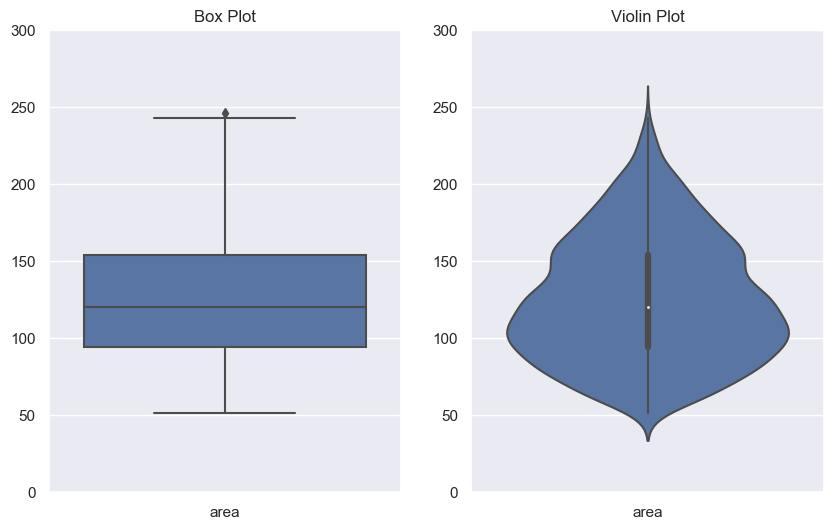

In [112]:
# Ajustando o tamanho padrão das imagens e fontes
sns.set(font_scale=1.0, rc={
    "figure.figsize": (10, 6),
})

ax = plt.subplot(121)
sns.boxplot(data=dados[["area"]], ax=ax)
plt.title("Box Plot"); plt.ylim([0, 300]);

ax = plt.subplot(122)
sns.violinplot(data=dados[["area"]], ax=ax)
plt.title("Violin Plot"); plt.ylim([0, 300]);

Podemos utilizar o argumento `hue` do `seaborn` para segmentar visualizações por categorias distintas com o emprego de cores.

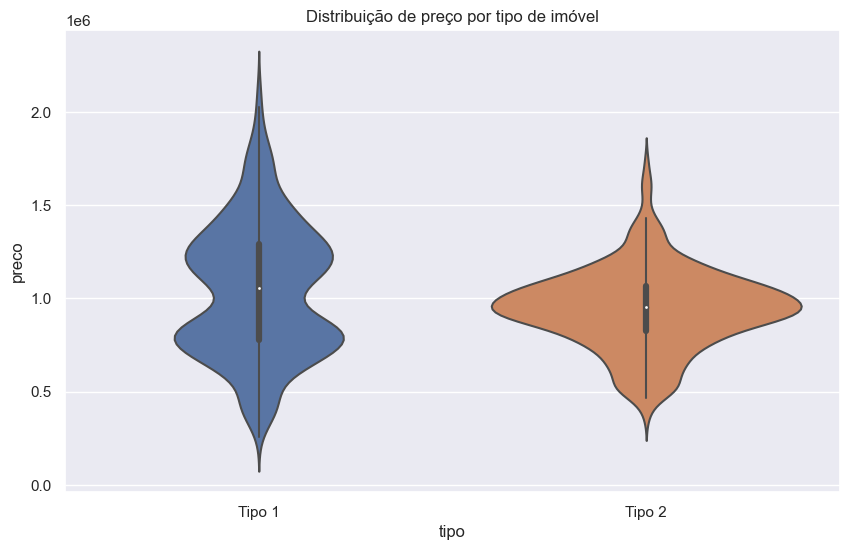

In [113]:
fig, ax = plt.subplots()
sns.violinplot(
    data=dados[dados.tipo.isin(["Tipo 1", "Tipo 2"])][["preco", "tipo"]], 
    y="preco", 
    x="tipo", 
    ax=ax
)
plt.title("Distribuição de preço por tipo de imóvel");

Além da distribuição das variáveis do nosso conjunto de dados (Análise Descritiva Univariada), podemos explorar relações entre pares utilizando a visualização `pairplot` do `seaborn` (Análise Descritiva Multivariada), que combina Funções de Densidade de Probabilidade (FDP, em inglês, *Probability Density Function*) com Gráficos de Disperção (`scatterplot`), como demonstrado na célula a seguir.

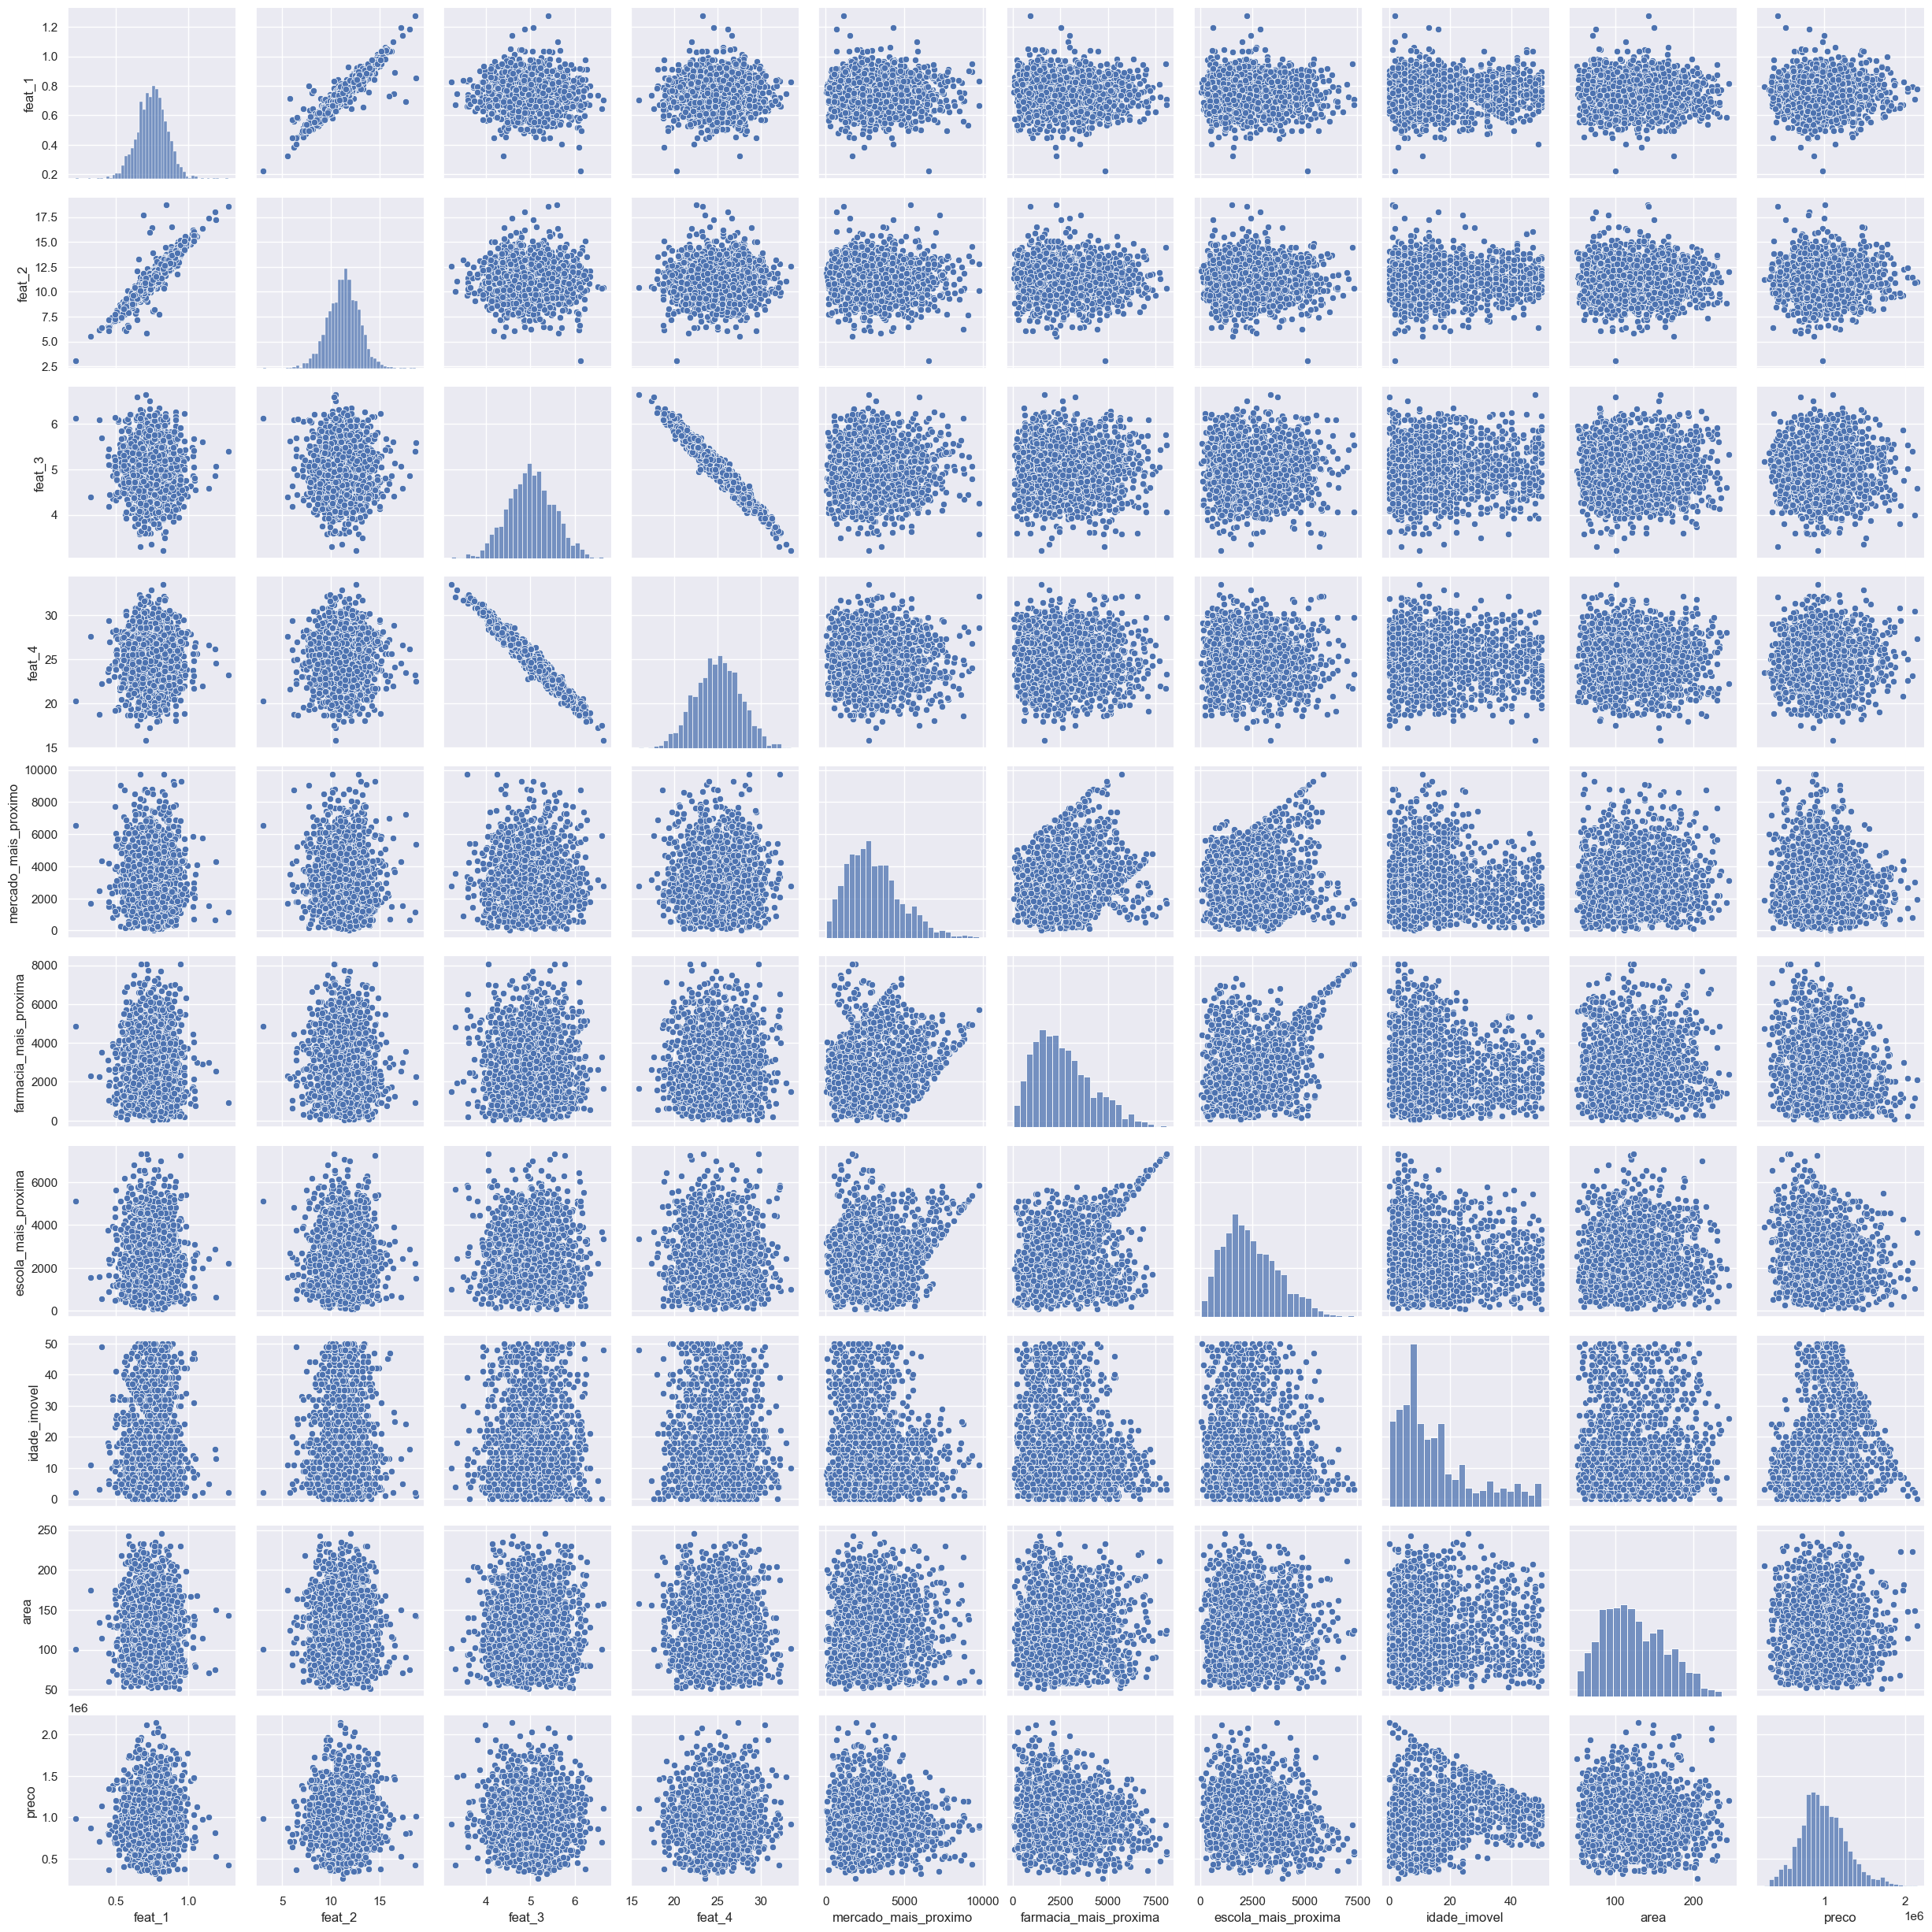

In [114]:
# A função .drop descarta algumas colunas do nosso DataFrame
sns.pairplot(
    dados.drop(columns=["loc_x", "loc_y", "num_penit_4km", "num_penit_500m"])
)

Utilizando a função `corr` do **Pandas**, junto com a visualização de mapa de calor do `heatmap` do `seaborn`, é possível criar um correlograma para mensurar, visualmente, as correlações entre as variáveis do conjunto de dados. Um adendo: a função `corr` admite apenas valores numéricos. Para contornar esse problema, podemos usar a função `select_dtypes` com o argumento `exclude="object"` para selecionar todas as colunas em que o tipo é diferente de `object`, ou seja, apenas as colunas que contém valores numéricos.

<AxesSubplot: >

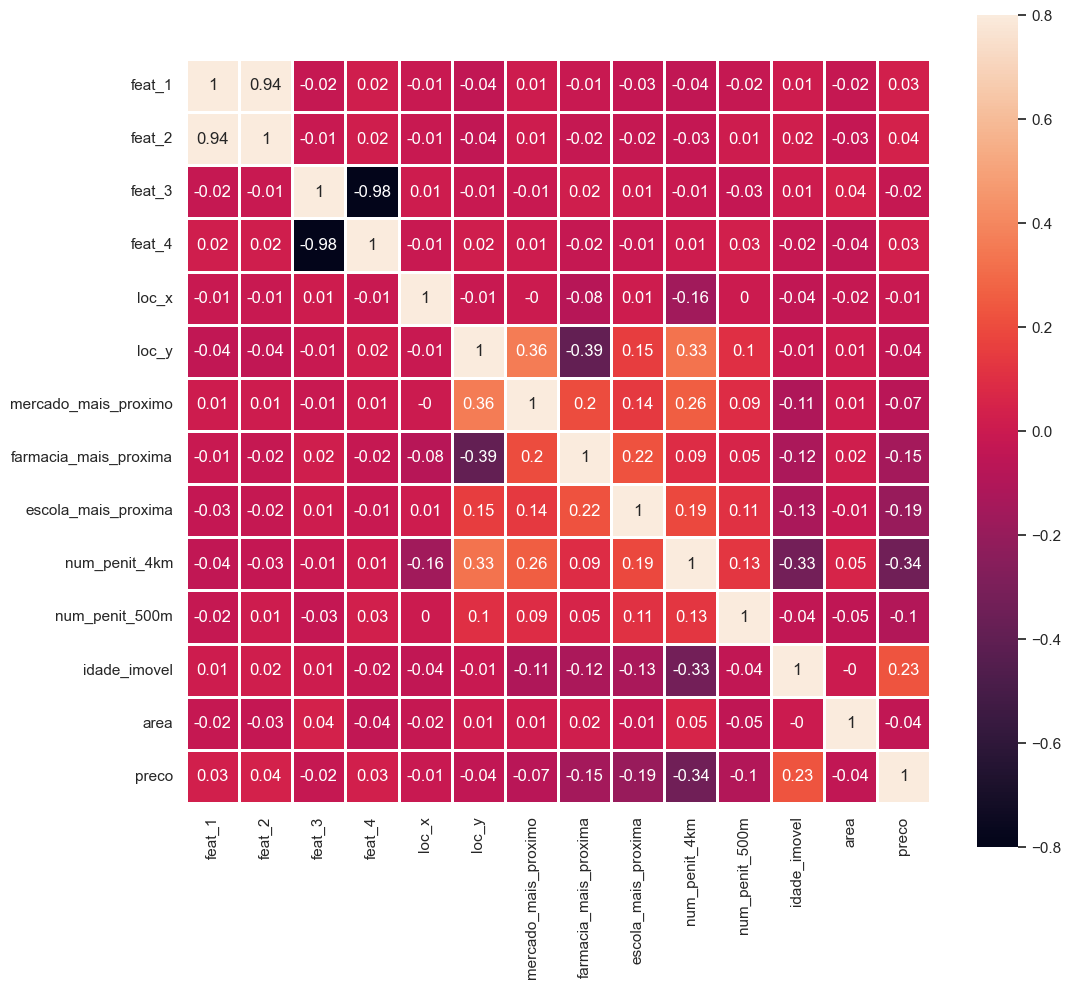

In [115]:
corr = dados.select_dtypes(exclude="object").corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, 
            annot=True,
            square=True, 
            vmax=.8,
            vmin=-.8,
            linewidths=2, 
            cbar_kws={"shrink": .9})

3 - Exercício
=============

O conjunto de arquivos de dados imobiliários contém erros sistemáticos, dados faltantes e outliers.

**Atividades**:

- Padronize as variáveis categóricas **tipo** e **cod_localidade**, remova as linhas com erros sistemáticos, e remove possíveis outliers (tipos ou localidades com frequência baixa);
- Para cada registro da base de dados, encontre a **regiao** por meio da coluna **uf** utilizando a base de estados do ibge disponibilizada para o exercício; 
- Realize a imputação de dados sobre as variáveis **feat_1**, **feat_2**, **feat_3** e **feat_4** utilizando regressão linear simples. Lembre-se que a partir da análise exploratória dos dados observa-se que **feat_1** tem correlação com **feat_2**, assim como **feat_3** tem correlação com **feat_4**, ou seja, precisamos encontrar duas equações:
  - $feat_1 = k_1 + c_1 feat_2$
  - $feat_3 = k_2 + c_2 feat_4$
- Remova os outliers dos pares de variáveis (**feat_1**, **feat_2**) e (**feat_3**, **feat_4**) utilizando o método z-score multidimensional;
- Identifique se existem outras variávies do conjunto com outliers, e, caso existam, remova os outliers citando a natureza da variável e o méteodo utilizado para identificação dos outliers;
- Após finalizar as atividades citadas anteriormente, remova todos os dados faltantes ainda presentes no conjunto de dados;
- Realize uma análise exploratória completa do conjunto de dados tratado;
- Salve o arquivo final em formato **parquet** com o nome *dados_tratados.parquet*;

**Informações adicionais**:

O prazo total para entrega do exercício é de 8 dias corridos, iniciando contagem a partir da data de disponibilização do exercício no Moodle;

A entrega deve ser feita no Moodle. Contudo, o exercício pode ser entregue em um arquivo comprimido **OU** via link compartilhado de um *fork* do projeto no github (ou alguma outra ferramenta de versionamento de código). Fica a critério do aluno escolher a melhor forma de entrega;

O arquivo (ou repositório git) da entrega, deve conter, obrigatóriamente:
- Uma cópia deste notebook (`exercicio.ipynb`) com a resolução das atividades;
- O arquivo `dados_tratados.parquet`, resultando do tratamento final da base de dados;

## **Resolução do Exercício**

### Padronize as variáveis categóricas **tipo** e **cod_localidade**, remova as linhas com erros sistemáticos, e remove possíveis outliers (tipos ou localidades com frequência baixa);

Analisando campos <code>tipo</code> e <code>cod_localidade</code>

In [116]:
dados['tipo'].value_counts()

Tipo 2           970
Tipo 1           858
tipo 2            32
tipo 1            31
TIPO 1            24
TIPO 2            18
Tipo 3             6
Localidade 9       4
Localidade 8       4
Localidade 6       4
Tipo 4             4
LOCALIDADE 6       1
Localidade 10      1
Localidade 5       1
TIPO 4             1
tipo 3             1
Localidade 7       1
Name: tipo, dtype: int64

In [117]:
dados['cod_localidade'].value_counts()

Localidade 3     463
Localidade 4     457
Localidade 2     453
Localidade 1     438
LOCALIDADE 2      16
localidade 1      16
localidade 4      15
localidade 2      14
LOCALIDADE 4      10
localidade 3       9
LOCALIDADE 1       9
LOCALIDADE 3       8
Tipo 2             7
Tipo 3             6
Localidade 8       6
Tipo 4             5
Localidade 7       4
Localidade 6       3
Localidade 9       2
Localidade 5       2
localidade 9       1
localidade 5       1
Localidade 10      1
tipo 4             1
localidade 7       1
Name: cod_localidade, dtype: int64

Tratativa para os campos <code>tipo</code> e <code>cod_localidade</code> será:
- Converter os textos em maiúsculo
- Eliminar os outliers 
  - <code>tipo</code> com texto 'LOCALIDADE'
  - <code>cod_localidade</code> com texto 'TIPO'

In [118]:
#- Converter os textos em maiúsculo
dados['tipo'] = dados['tipo'].str.upper()
dados['cod_localidade'] = dados['cod_localidade'].str.upper()

# - Eliminar os outliers 
#   - tipo com texto 'LOCALIDADE'
dados = dados[dados['tipo'].str.contains('TIPO', na=False)]

#   - cod_localidade com texto 'TIPO'
dados = dados[dados['cod_localidade'].str.contains('LOCALIDADE', na=False)]

Verificando o resultado

In [119]:
dados['tipo'].value_counts()

TIPO 2    978
TIPO 1    859
TIPO 3      7
TIPO 4      5
Name: tipo, dtype: int64

In [120]:
dados['cod_localidade'].value_counts()

LOCALIDADE 4     464
LOCALIDADE 2     462
LOCALIDADE 3     460
LOCALIDADE 1     443
LOCALIDADE 7       5
LOCALIDADE 8       5
LOCALIDADE 9       3
LOCALIDADE 5       3
LOCALIDADE 6       3
LOCALIDADE 10      1
Name: cod_localidade, dtype: int64

### Para cada registro da base de dados, encontre a **regiao** por meio da coluna **uf** utilizando a base de estados do ibge disponibilizada para o exercício; 

Carregando data source de UFs

In [121]:
uf = pd.read_csv("estados.csv")
uf.head()

cod_uf_ibge             estado  uf        regiao  qtd_municipios
0           41             PARANA  PR    REGIAO SUL             399
1           42     SANTA CATARINA  SC    REGIAO SUL             295
2           43  RIO GRANDE DO SUL  RS    REGIAO SUL             497
3           15               PARA  PA  REGIAO NORTE             144
4           13           AMAZONAS  AM  REGIAO NORTE              62

Join do novo dataframe com <code>dados</code>

In [122]:
dados = dados.merge(uf[['uf', 'regiao']], how='left', on='uf')

In [123]:
dados.sample(5).T

984              1398          1673  \
uf                                 MG               PI            PA   
tipo                           TIPO 2           TIPO 2        TIPO 2   
cod_localidade           LOCALIDADE 3     LOCALIDADE 1  LOCALIDADE 1   
feat_1                       0.619366         0.624546      0.861918   
feat_2                       9.589745         9.886718     13.195726   
feat_3                        5.04759         5.015161      4.904734   
feat_4                       25.07273        26.132674     24.930581   
loc_x                        0.836637         0.185351      0.985792   
loc_y                        0.327702         0.333165      0.744716   
mercado_mais_proximo      2683.038787      1503.607553    385.176751   
farmacia_mais_proxima     2243.842399      3794.616847   1630.761705   
escola_mais_proxima       2928.329834              NaN   3446.457453   
num_penit_4km                     0.0              1.0           0.0   
num_penit_500m                    0.0              1.0           0.0   
idade_imovel                     48.0              8.0          20.0   
area                             92.0             95.0         168.0   
preco                         1039444           552427        692164   
regiao                 REGIAO SUDESTE  REGIAO NORDESTE  REGIAO NORTE   

                               297                  295   
uf                               PR                   GO  
tipo                         TIPO 2               TIPO 1  
cod_localidade         LOCALIDADE 3         LOCALIDADE 2  
feat_1                     0.746559             0.823407  
feat_2                    11.874437            12.447106  
feat_3                     3.863499             5.530415  
feat_4                     31.25503            21.664582  
loc_x                      0.080961               0.7514  
loc_y                      0.080191             0.427213  
mercado_mais_proximo            NaN          2278.153357  
farmacia_mais_proxima   4713.846648                  NaN  
escola_mais_proxima     1155.605985                  NaN  
num_penit_4km                   0.0                  0.0  
num_penit_500m                  0.0                  0.0  
idade_imovel                    9.0                  6.0  
area                           66.0                152.0  
preco                       1573339               627409  
regiao                   REGIAO SUL  REGIAO CENTRO-OESTE

### Realize a imputação de dados sobre as variáveis **feat_1**, **feat_2**, **feat_3** e **feat_4** utilizando regressão linear simples. Lembre-se que a partir da análise exploratória dos dados observa-se que **feat_1** tem correlação com **feat_2**, assim como **feat_3** tem correlação com **feat_4**, ou seja, precisamos encontrar duas equações:
  - $feat_1 = k_1 + c_1 feat_2$
  - $feat_3 = k_2 + c_2 feat_4$

#### **Tratativa para feat_1**

Verificando dados nulos

In [124]:
dados[dados["feat_1"].isna()]

uf    tipo cod_localidade  feat_1     feat_2    feat_3     feat_4  \
416   DF  TIPO 2   LOCALIDADE 4     NaN  11.894216  5.279820  24.134925   
752   GO  TIPO 2   LOCALIDADE 4     NaN  10.546326       NaN  25.021204   
1407  TO  TIPO 1   LOCALIDADE 3     NaN   8.485180  5.032627  24.090087   
1674  RJ  TIPO 2   LOCALIDADE 1     NaN  11.878363  5.154765  24.760516   
1705  RN  TIPO 1   LOCALIDADE 3     NaN  10.611992  4.591608  26.095352   

         loc_x     loc_y  mercado_mais_proximo  farmacia_mais_proxima  \
416   0.134077  0.209492           1321.245634            1008.853084   
752   0.009390  0.041152                   NaN            1748.382604   
1407  0.843803  0.548248           2547.970268            1263.494756   
1674  0.071656  0.401594           2524.386471            3372.675247   
1705  0.988973  0.449849           3913.792795            1667.829935   

      escola_mais_proxima  num_penit_4km  num_penit_500m  idade_imovel   area  \
416                   NaN            0.0             0.0           8.0  197.0   
752           2113.389868            0.0             0.0          25.0   78.0   
1407                  NaN            0.0             0.0          30.0  134.0   
1674          3602.343297            1.0             0.0          24.0  119.0   
1705          1568.772097            0.0             0.0          33.0  169.0   

        preco               regiao  
416    784117  REGIAO CENTRO-OESTE  
752    655796  REGIAO CENTRO-OESTE  
1407  1059614         REGIAO NORTE  
1674   911318       REGIAO SUDESTE  
1705   965630      REGIAO NORDESTE

Treinando modelo de regressão linear

In [125]:
from sklearn.linear_model import LinearRegression

mod1 = dados[~((dados['feat_1'].isna()) | (dados['feat_2'].isna()))][['feat_1', 'feat_2']]
data1, target1 = mod1[['feat_2']], mod1['feat_1']

# Modelo de regressão linear para preencher feat_1 a partir de feat_2
linear_regression1 = LinearRegression()
linear_regression1.fit(data1, target1)

linear_regression1.intercept_, linear_regression1.coef_[0]

(0.09025943734301134, 0.05851479366806308)

Calculando o valor para os registros nulos

In [126]:
# Predição
linhas1 = dados[((dados['feat_1'].isna()) & ~(dados['feat_2'].isna()))][['feat_1', 'feat_2']]
linhas1['feat_1'] = linear_regression1.predict(linhas1[['feat_2']])
linhas1

feat_1     feat_2
416   0.786247  11.894216
752   0.707376  10.546326
1407  0.586768   8.485180
1674  0.785319  11.878363
1705  0.711218  10.611992

Colocando os dados na tabela

In [127]:
dados = dados.combine_first(linhas1[['feat_1']])
dados.iloc[linhas1.index]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
416   197.0   LOCALIDADE 4                  NaN            1008.853084   
752    78.0   LOCALIDADE 4          2113.389868            1748.382604   
1407  134.0   LOCALIDADE 3                  NaN            1263.494756   
1674  119.0   LOCALIDADE 1          3602.343297            3372.675247   
1705  169.0   LOCALIDADE 3          1568.772097            1667.829935   

        feat_1     feat_2    feat_3     feat_4  idade_imovel     loc_x  \
416   0.786247  11.894216  5.279820  24.134925           8.0  0.134077   
752   0.707376  10.546326       NaN  25.021204          25.0  0.009390   
1407  0.586768   8.485180  5.032627  24.090087          30.0  0.843803   
1674  0.785319  11.878363  5.154765  24.760516          24.0  0.071656   
1705  0.711218  10.611992  4.591608  26.095352          33.0  0.988973   

         loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
416   0.209492           1321.245634            0.0             0.0   784117   
752   0.041152                   NaN            0.0             0.0   655796   
1407  0.548248           2547.970268            0.0             0.0  1059614   
1674  0.401594           2524.386471            1.0             0.0   911318   
1705  0.449849           3913.792795            0.0             0.0   965630   

                   regiao    tipo  uf  
416   REGIAO CENTRO-OESTE  TIPO 2  DF  
752   REGIAO CENTRO-OESTE  TIPO 2  GO  
1407         REGIAO NORTE  TIPO 1  TO  
1674       REGIAO SUDESTE  TIPO 2  RJ  
1705      REGIAO NORDESTE  TIPO 1  RN

#### **Tratativa para feat_2**

Verificando dados nulos

In [128]:
dados[dados["feat_2"].isna()]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
353  138.0   LOCALIDADE 4           702.610572            2349.148799   
530  173.0   LOCALIDADE 4           541.994303            3542.762115   
753  109.0   LOCALIDADE 3          1680.366155            5014.109242   
854    NaN   LOCALIDADE 4           489.390177            2494.231331   

       feat_1  feat_2    feat_3     feat_4  idade_imovel     loc_x     loc_y  \
353  0.708040     NaN  5.237708  24.317772           7.0  0.059897  0.764271   
530  0.773455     NaN  4.514915  28.042704          21.0  0.023371  0.883181   
753  0.560737     NaN       NaN  28.118143          27.0  0.146183  0.025137   
854  0.495872     NaN  6.134425  19.197787          23.0  0.753835  0.458370   

     mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
353           4011.653788            0.0             0.0   974132   
530           5252.492607            0.0             0.0   837323   
753           4855.384876            0.0             0.0   980525   
854           3859.275882            0.0             0.0  1006512   

              regiao    tipo  uf  
353   REGIAO SUDESTE  TIPO 2  RJ  
530       REGIAO SUL  TIPO 2  PR  
753  REGIAO NORDESTE  TIPO 2  AL  
854       REGIAO SUL  TIPO 1  RS

Treinando modelo de regressão linear

In [129]:
mod2 = dados[~((dados['feat_2'].isna()) | (dados['feat_1'].isna()))][['feat_2', 'feat_1']]
data2, target2 = mod1[['feat_1']], mod1['feat_2']

# Modelo de regressão linear para preencher feat_2 a partir de feat_1
linear_regression2 = LinearRegression()
linear_regression2.fit(data2, target2)

linear_regression2.intercept_, linear_regression1.coef_[0]

(-0.051657889085674924, 0.05851479366806308)

Calculando o valor para os registros nulos

In [130]:
# Predição
linhas2 = dados[((dados['feat_2'].isna()) & ~(dados['feat_1'].isna()))][['feat_2', 'feat_1']]
linhas2['feat_2'] = linear_regression2.predict(linhas2[['feat_1']])
linhas2

feat_2    feat_1
353  10.644745  0.708040
530  11.632981  0.773455
753   8.419436  0.560737
854   7.439512  0.495872

Colocando os dados na tabela

In [131]:
dados = dados.combine_first(linhas2[['feat_2']])
dados.iloc[linhas2.index]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
353  138.0   LOCALIDADE 4           702.610572            2349.148799   
530  173.0   LOCALIDADE 4           541.994303            3542.762115   
753  109.0   LOCALIDADE 3          1680.366155            5014.109242   
854    NaN   LOCALIDADE 4           489.390177            2494.231331   

       feat_1     feat_2    feat_3     feat_4  idade_imovel     loc_x  \
353  0.708040  10.644745  5.237708  24.317772           7.0  0.059897   
530  0.773455  11.632981  4.514915  28.042704          21.0  0.023371   
753  0.560737   8.419436       NaN  28.118143          27.0  0.146183   
854  0.495872   7.439512  6.134425  19.197787          23.0  0.753835   

        loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
353  0.764271           4011.653788            0.0             0.0   974132   
530  0.883181           5252.492607            0.0             0.0   837323   
753  0.025137           4855.384876            0.0             0.0   980525   
854  0.458370           3859.275882            0.0             0.0  1006512   

              regiao    tipo  uf  
353   REGIAO SUDESTE  TIPO 2  RJ  
530       REGIAO SUL  TIPO 2  PR  
753  REGIAO NORDESTE  TIPO 2  AL  
854       REGIAO SUL  TIPO 1  RS

#### **Tratativa para feat_3**

Verificando dados nulos

In [132]:
dados[dados["feat_3"].isna()]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
19    154.0   LOCALIDADE 2          4912.214830            5060.047221   
154   129.0   LOCALIDADE 3          1851.160120             791.204881   
234   168.0   LOCALIDADE 4          2691.327831            2976.354977   
388    90.0   LOCALIDADE 4          2365.457117            2561.910775   
612    94.0   LOCALIDADE 2           759.577405            1449.419244   
752    78.0   LOCALIDADE 4          2113.389868            1748.382604   
753   109.0   LOCALIDADE 3          1680.366155            5014.109242   
1283   91.0   LOCALIDADE 4                  NaN            3549.319697   
1530  107.0   LOCALIDADE 2          1824.187805            2047.024912   
1620  149.0   LOCALIDADE 4          1575.246910            1585.887357   
1692  132.0   LOCALIDADE 3          1560.081932            1640.988540   

        feat_1     feat_2  feat_3     feat_4  idade_imovel     loc_x  \
19    0.873494  12.694420     NaN        NaN           4.0  0.022382   
154   0.643927  10.512181     NaN  24.133014          37.0  0.445328   
234   1.062613  15.571423     NaN  25.625880           8.0  0.299070   
388   0.833458  12.582898     NaN  23.557084           7.0  0.289634   
612   0.749328  11.516348     NaN  27.053860           8.0  0.733288   
752   0.707376  10.546326     NaN  25.021204          25.0  0.009390   
753   0.560737   8.419436     NaN  28.118143          27.0  0.146183   
1283  0.693281  17.695223     NaN  23.551280          24.0  0.546644   
1530  0.752850  11.614598     NaN  26.742494           1.0  0.694484   
1620  0.784608  11.962325     NaN  23.659242           6.0  0.090271   
1692  0.719582  10.669213     NaN  24.167110          45.0  0.788437   

         loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
19    0.670309           4161.214644            1.0             0.0   809200   
154   0.923401           3208.492475            0.0             0.0  1339898   
234   0.754948           4117.883895            1.0             0.0  1130551   
388   0.612326           2793.474672            0.0             0.0   956083   
612   0.370385           2096.253158            0.0             0.0  1000334   
752   0.041152                   NaN            0.0             0.0   655796   
753   0.025137           4855.384876            0.0             0.0   980525   
1283  0.975837           7240.311916            1.0             1.0   797592   
1530  0.652471           2958.466776            0.0             0.0   843311   
1620  0.682312           3148.154356            0.0             0.0   969608   
1692  0.611894           2318.142211            0.0             0.0  1147717   

                   regiao    tipo  uf  
19         REGIAO SUDESTE  TIPO 1  SP  
154        REGIAO SUDESTE  TIPO 1  SP  
234            REGIAO SUL  TIPO 1  SC  
388        REGIAO SUDESTE  TIPO 2  RJ  
612        REGIAO SUDESTE  TIPO 2  RJ  
752   REGIAO CENTRO-OESTE  TIPO 2  GO  
753       REGIAO NORDESTE  TIPO 2  AL  
1283       REGIAO SUDESTE  TIPO 2  SP  
1530       REGIAO SUDESTE  TIPO 1  SP  
1620       REGIAO SUDESTE  TIPO 2  RJ  
1692       REGIAO SUDESTE  TIPO 1  SP

Treinando modelo de regressão linear

In [133]:
mod3 = dados[~((dados['feat_3'].isna()) | (dados['feat_4'].isna()))][['feat_3', 'feat_4']]
data3, target3 = mod3[['feat_4']], mod3['feat_3']

# Modelo de regressão linear para preencher feat_3 a partir de feat_4
linear_regression3 = LinearRegression()
linear_regression3.fit(data3, target3)

linear_regression3.intercept_, linear_regression3.coef_[0]

(9.797050542044037, -0.19186720609794577)

Calculando o valor para os registros nulos

In [134]:
# Predição
linhas3 = dados[((dados['feat_3'].isna()) & ~(dados['feat_4'].isna()))][['feat_3', 'feat_4']]
linhas3['feat_3'] = linear_regression3.predict(linhas3[['feat_4']])
linhas3

feat_3     feat_4
154   5.166716  24.133014
234   4.880284  25.625880
388   5.277219  23.557084
612   4.606302  27.053860
752   4.996302  25.021204
753   4.402101  28.118143
1283  5.278332  23.551280
1530  4.666043  26.742494
1620  5.257618  23.659242
1692  5.160175  24.167110

Colocando os dados na tabela

In [135]:
dados = dados.combine_first(linhas3[['feat_3']])
dados.iloc[linhas3.index]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
154   129.0   LOCALIDADE 3          1851.160120             791.204881   
234   168.0   LOCALIDADE 4          2691.327831            2976.354977   
388    90.0   LOCALIDADE 4          2365.457117            2561.910775   
612    94.0   LOCALIDADE 2           759.577405            1449.419244   
752    78.0   LOCALIDADE 4          2113.389868            1748.382604   
753   109.0   LOCALIDADE 3          1680.366155            5014.109242   
1283   91.0   LOCALIDADE 4                  NaN            3549.319697   
1530  107.0   LOCALIDADE 2          1824.187805            2047.024912   
1620  149.0   LOCALIDADE 4          1575.246910            1585.887357   
1692  132.0   LOCALIDADE 3          1560.081932            1640.988540   

        feat_1     feat_2    feat_3     feat_4  idade_imovel     loc_x  \
154   0.643927  10.512181  5.166716  24.133014          37.0  0.445328   
234   1.062613  15.571423  4.880284  25.625880           8.0  0.299070   
388   0.833458  12.582898  5.277219  23.557084           7.0  0.289634   
612   0.749328  11.516348  4.606302  27.053860           8.0  0.733288   
752   0.707376  10.546326  4.996302  25.021204          25.0  0.009390   
753   0.560737   8.419436  4.402101  28.118143          27.0  0.146183   
1283  0.693281  17.695223  5.278332  23.551280          24.0  0.546644   
1530  0.752850  11.614598  4.666043  26.742494           1.0  0.694484   
1620  0.784608  11.962325  5.257618  23.659242           6.0  0.090271   
1692  0.719582  10.669213  5.160175  24.167110          45.0  0.788437   

         loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
154   0.923401           3208.492475            0.0             0.0  1339898   
234   0.754948           4117.883895            1.0             0.0  1130551   
388   0.612326           2793.474672            0.0             0.0   956083   
612   0.370385           2096.253158            0.0             0.0  1000334   
752   0.041152                   NaN            0.0             0.0   655796   
753   0.025137           4855.384876            0.0             0.0   980525   
1283  0.975837           7240.311916            1.0             1.0   797592   
1530  0.652471           2958.466776            0.0             0.0   843311   
1620  0.682312           3148.154356            0.0             0.0   969608   
1692  0.611894           2318.142211            0.0             0.0  1147717   

                   regiao    tipo  uf  
154        REGIAO SUDESTE  TIPO 1  SP  
234            REGIAO SUL  TIPO 1  SC  
388        REGIAO SUDESTE  TIPO 2  RJ  
612        REGIAO SUDESTE  TIPO 2  RJ  
752   REGIAO CENTRO-OESTE  TIPO 2  GO  
753       REGIAO NORDESTE  TIPO 2  AL  
1283       REGIAO SUDESTE  TIPO 2  SP  
1530       REGIAO SUDESTE  TIPO 1  SP  
1620       REGIAO SUDESTE  TIPO 2  RJ  
1692       REGIAO SUDESTE  TIPO 1  SP

#### **Tratativa para feat_4**

Verificando dados nulos

In [136]:
dados[dados["feat_4"].isna()]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
19    154.0   LOCALIDADE 2          4912.214830            5060.047221   
1161  152.0   LOCALIDADE 3          1679.077407            1600.241005   
1413  167.0   LOCALIDADE 4          2434.284471            1952.048114   
1418   77.0   LOCALIDADE 1          1061.190661            2441.133718   

        feat_1     feat_2    feat_3  feat_4  idade_imovel     loc_x     loc_y  \
19    0.873494  12.694420       NaN     NaN           4.0  0.022382  0.670309   
1161  0.764757  10.941713  5.162284     NaN          27.0  0.881361  0.755928   
1413  0.945070  14.723227  4.840539     NaN          14.0  0.201677  0.648954   
1418  0.761756  11.518901  5.212024     NaN          14.0  0.850677  0.314854   

      mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
19             4161.214644            1.0             0.0   809200   
1161           2408.878917            0.0             0.0  1346665   
1413           2819.084895            0.0             0.0   876129   
1418           4235.656754            0.0             0.0  1097282   

               regiao    tipo  uf  
19     REGIAO SUDESTE  TIPO 1  SP  
1161   REGIAO SUDESTE  TIPO 2  SP  
1413  REGIAO NORDESTE  TIPO 1  CE  
1418   REGIAO SUDESTE  TIPO 2  ES

Treinando modelo de regressão linear

In [137]:
mod4 = dados[~((dados['feat_4'].isna()) | (dados['feat_3'].isna()))][['feat_4', 'feat_3']]
data4, target4 = mod4[['feat_3']], mod4['feat_4']

# Modelo de regressão linear para preencher feat_4 a partir de feat_3
linear_regression4 = LinearRegression()
linear_regression4.fit(data4, target4)

linear_regression4.intercept_, linear_regression4.coef_[0]

(50.06416434998965, -5.012554342790257)

Calculando o valor para os registros nulos

In [138]:
# Predição
linhas4 = dados[((dados['feat_4'].isna()) & ~(dados['feat_3'].isna()))][['feat_4', 'feat_3']]
linhas4['feat_4'] = linear_regression4.predict(linhas4[['feat_3']])
linhas4

feat_4    feat_3
1161  24.187934  5.162284
1413  25.800702  4.840539
1418  23.938611  5.212024

Colocando os dados na tabela

In [139]:
# Colocando os dados na tabela 
dados = dados.combine_first(linhas4[['feat_4']])
dados.iloc[linhas4.index]

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
1161  152.0   LOCALIDADE 3          1679.077407            1600.241005   
1413  167.0   LOCALIDADE 4          2434.284471            1952.048114   
1418   77.0   LOCALIDADE 1          1061.190661            2441.133718   

        feat_1     feat_2    feat_3     feat_4  idade_imovel     loc_x  \
1161  0.764757  10.941713  5.162284  24.187934          27.0  0.881361   
1413  0.945070  14.723227  4.840539  25.800702          14.0  0.201677   
1418  0.761756  11.518901  5.212024  23.938611          14.0  0.850677   

         loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
1161  0.755928           2408.878917            0.0             0.0  1346665   
1413  0.648954           2819.084895            0.0             0.0   876129   
1418  0.314854           4235.656754            0.0             0.0  1097282   

               regiao    tipo  uf  
1161   REGIAO SUDESTE  TIPO 2  SP  
1413  REGIAO NORDESTE  TIPO 1  CE  
1418   REGIAO SUDESTE  TIPO 2  ES

### Remova os outliers dos pares de variáveis (**feat_1**, **feat_2**) e (**feat_3**, **feat_4**) utilizando o método z-score multidimensional;

#### (**feat_1**, **feat_2**)

In [140]:
def eigsorted(cov):
    """
    Encontra os auto-valores e auto-vetores de uma matriz de variância-covariância.
    Os auto-valores e auto-vetores nos ajudam a normalizar amostras de distribuições
    multivariadas.
    
    :cov: Matriz de variância-covariância.
    """
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]  

def plot_cov_ellipse(mean, cov, nstd=2, ax=None, **kwargs):
    """
    Função utiliada para desenhar uma elipse que representa o intervalo
    de confiança de uma distribuição bivariada (Gaussiana em duas dimensões).
    
    :mean: Ponto central da elipse (gaussiana bivariada)
    :cov: Matrix de variância-covariância da distribuição gaussiana bivariada
    :nstd: Limite de confiança, em termos de desvios padrões
    :ax: Handler em que a elipse deve ser desenhada
    """


    if ax is None:
        ax = plt.gca()
    
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

Visualizando os dados por meio de um scatter-plot (gráfico de dispersão)

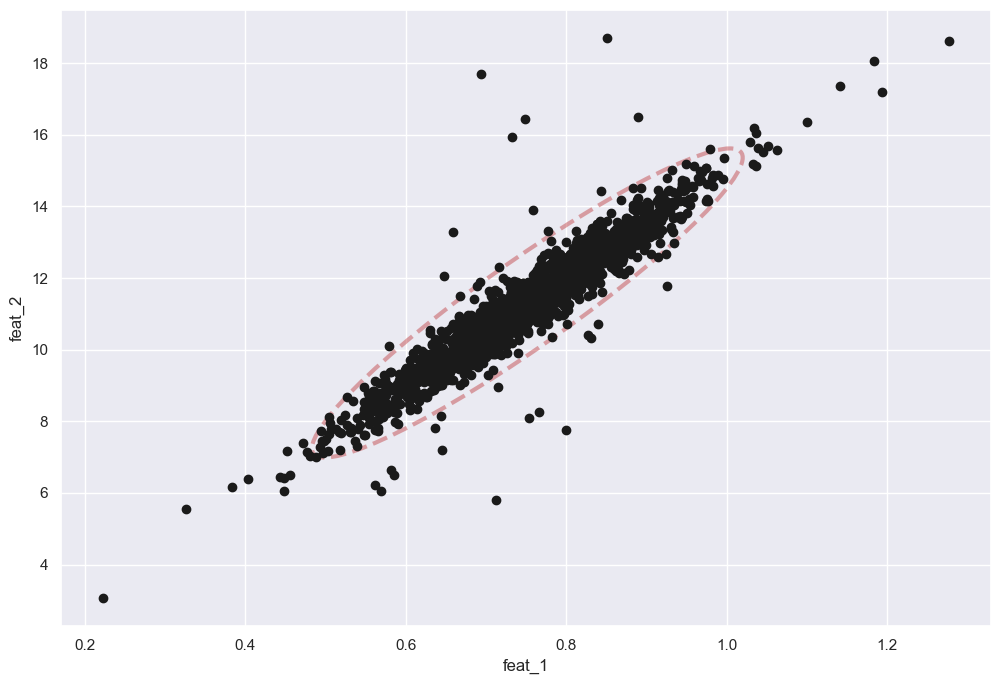

In [141]:
fig = plt.subplots(figsize=(12, 8))
plt.plot(dados["feat_1"], dados["feat_2"], 'k.', ms=12)
plt.xlabel("feat_1")
plt.ylabel("feat_2")

linhas1 = dados[(~(dados['feat_1'].isna()) & ~(dados['feat_2'].isna()))][['feat_1', 'feat_2']]
stack1 = np.vstack([linhas1])
mean1 = stack1.mean(axis=0)
cov1 = np.cov(stack1, rowvar=0)
plot_cov_ellipse(mean1, cov1, nstd=2.576, color="r", ls="--", lw=3, fc=None, fill=False, alpha=0.5)

In [142]:
def filter_multinorm(dataframe, columns, n_stds=2.576):
    """
    Remove outliers de um conjunto de variáveis aleatórias com distribuição normal `columns` 
    de um conjunto de dados `dataframe` utilizando o método z-score n-dimensional. O ponto
    de corte para exclusão da amostra é dado pelo número de desvios padrões `n_stds` de distância da
    origem após aplicação do processo de estandardização dos dados.
    
    Esta função não é executada recursivamente, mas pode ser facilmente estendida para este fim seguindo
    os passos da função de exemplo para o caso unimodal.
    
    :dataframe: Um dataframe do pandas
    :columns: O nome das colunas alvo que contém as variáveis aleatórias normais
    :n_stds: O número de desvios padrões de distância da origem para utilizar como `cutpoint`
    """
    dataframe = dataframe.copy()
    X = dataframe[columns].values
    mean = X.mean(axis=0)
    cov = np.cov(X, rowvar=0)
    
    vals, vecs = eigsorted(cov)
    Z = (X - mean).dot(vecs)
    Zstd = np.sqrt(np.diag(np.cov(Z, rowvar=0)))
    Zvals = Z / Zstd
    
    # Distances from origin
    D = np.sqrt((Zvals ** 2).sum(axis=1))
    dataframe["outlier"] = np.abs(D) >= n_stds
    return dataframe

Aplicando a rotina para identificação dos outliers

<AxesSubplot: xlabel='feat_1', ylabel='feat_2'>

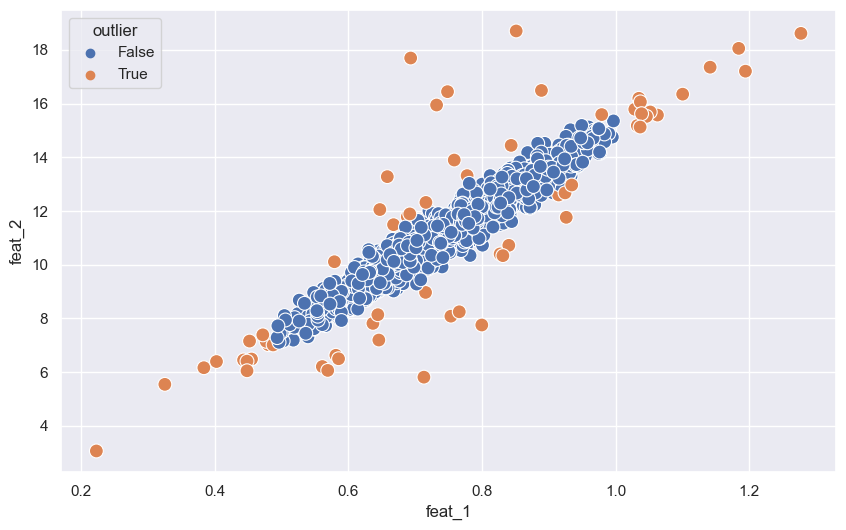

In [143]:
# Aplicando a rotina 
linhas1 = filter_multinorm(linhas1, ['feat_1', 'feat_2'])
 
sns.scatterplot(data=linhas1, x='feat_1', y='feat_2', hue="outlier", s=100)

In [144]:
linhas1.query("outlier == True")

feat_1     feat_2  outlier
12    0.645642   7.196911     True
32    0.480254   7.023826     True
48    0.827131  10.401739     True
73    1.100331  16.349640     True
74    0.851182  18.702170     True
...        ...        ...      ...
1741  0.889006  16.488195     True
1760  0.448344   6.052536     True
1777  1.036695  15.125645     True
1797  0.758478  13.897108     True
1829  0.402643   6.396664     True

[62 rows x 3 columns]

Anotando no dataframe <code>dados</code> no campo <code>oultier1</code>

In [145]:
linhas1['outlier1'] = linhas1['outlier']

dados = dados.merge(linhas1[['outlier1']], how='left', left_index=True, right_index=True)

In [146]:
dados.query("outlier1 == True")

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
12    137.0   LOCALIDADE 4          1060.486648            4563.944918   
32    129.0   LOCALIDADE 3          1168.077573            3977.952685   
48    100.0   LOCALIDADE 1           348.970027            5168.283517   
73    114.0   LOCALIDADE 4          2006.571667            2891.631214   
74    142.0   LOCALIDADE 4          1501.519960            2263.152662   
...     ...            ...                  ...                    ...   
1741  105.0   LOCALIDADE 3          3237.763842            1258.404897   
1760   96.0   LOCALIDADE 2          1658.368667            1031.822851   
1777  131.0   LOCALIDADE 3          2004.701434            2154.267565   
1797  105.0   LOCALIDADE 2          2772.776324            1727.842501   
1829  114.0   LOCALIDADE 3           540.941307            3501.680221   

        feat_1     feat_2    feat_3     feat_4  idade_imovel     loc_x  \
12    0.645642   7.196911  5.237109  23.072962           9.0  0.905381   
32    0.480254   7.023826  4.858319  24.352386          33.0  0.515254   
48    0.827131  10.401739  3.896580  30.057138           4.0  0.422951   
73    1.100331  16.349640  5.612943  21.958705           2.0  0.854212   
74    0.851182  18.702170  5.594558  22.549717           1.0  0.791051   
...        ...        ...       ...        ...           ...       ...   
1741  0.889006  16.488195  5.128528  24.101895          25.0  0.950607   
1760  0.448344   6.052536  4.184914  29.410718           5.0  0.610380   
1777  1.036695  15.125645  5.043903  24.821704          31.0  0.855626   
1797  0.758478  13.897108  4.667160  27.495113           1.0  0.876321   
1829  0.402643   6.396664  5.690731  22.223757          49.0  0.073151   

         loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
12    0.317289           3815.334934            0.0             0.0   762396   
32    0.192295            806.437213            0.0             0.0  1387763   
48    0.133550           2763.987709            1.0             0.0  1213158   
73    0.622955           5781.680393            0.0             0.0   973021   
74    0.609390           5389.192890            0.0             0.0  1007909   
...        ...                   ...            ...             ...      ...   
1741  0.276433           3638.050899            0.0             0.0  1461993   
1760  0.810518           4212.549122            2.0             0.0   791886   
1777  0.420204           2635.514158            0.0             0.0  1478663   
1797  0.675634           1253.588212            1.0             0.0   751407   
1829  0.223743           4317.444837            0.0             0.0  1133051   

                   regiao    tipo  uf  outlier1  
12    REGIAO CENTRO-OESTE  TIPO 2  MS      True  
32         REGIAO SUDESTE  TIPO 1  SP      True  
48         REGIAO SUDESTE  TIPO 2  RJ      True  
73         REGIAO SUDESTE  TIPO 2  ES      True  
74         REGIAO SUDESTE  TIPO 2  ES      True  
...                   ...     ...  ..       ...  
1741       REGIAO SUDESTE  TIPO 1  MG      True  
1760       REGIAO SUDESTE  TIPO 1  MG      True  
1777       REGIAO SUDESTE  TIPO 1  MG      True  
1797           REGIAO SUL  TIPO 1  PR      True  
1829       REGIAO SUDESTE  TIPO 2  SP      True  

[62 rows x 19 columns]

#### (**feat_3**, **feat_4**)

Visualizando os dados por meio de um scatter-plot (gráfico de dispersão)

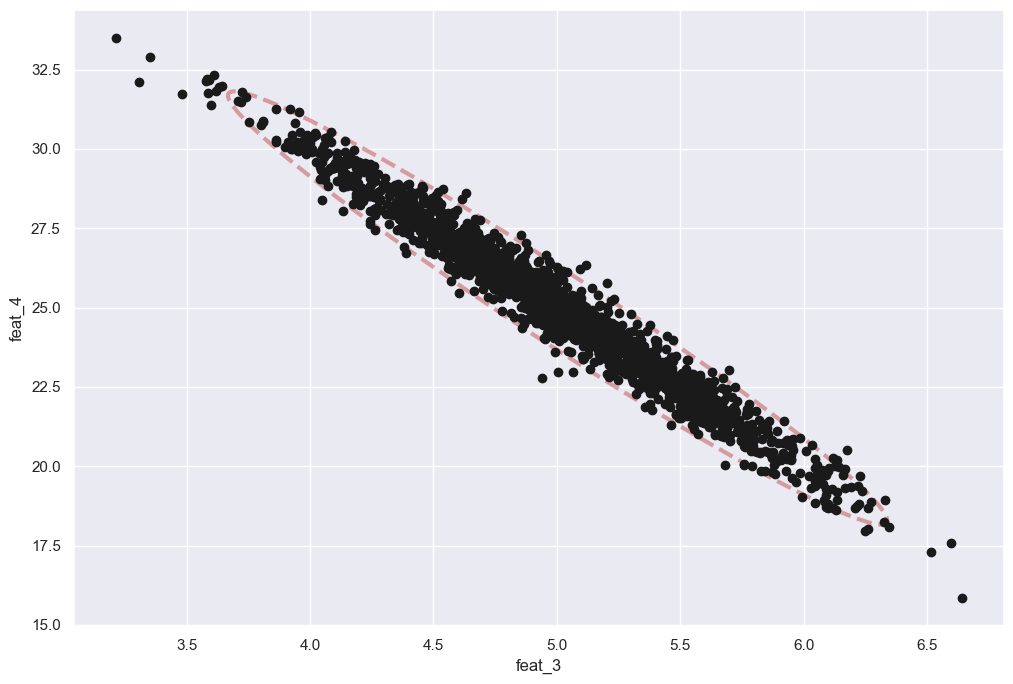

In [147]:

fig = plt.subplots(figsize=(12, 8))
plt.plot(dados["feat_3"], dados["feat_4"], 'k.', ms=12)
plt.xlabel("feat_3")
plt.ylabel("feat_4")

linhas3 = dados[(~(dados['feat_3'].isna()) & ~(dados['feat_4'].isna()))][['feat_3', 'feat_4']]
stack3 = np.vstack([linhas3])
mean3 = stack3.mean(axis=0)
cov3 = np.cov(stack3, rowvar=0)
plot_cov_ellipse(mean3, cov3, nstd=2.576, color="r", ls="--", lw=3, fc=None, fill=False, alpha=0.5)

Aplicando a rotina para identificação dos outliers

<AxesSubplot: xlabel='feat_3', ylabel='feat_4'>

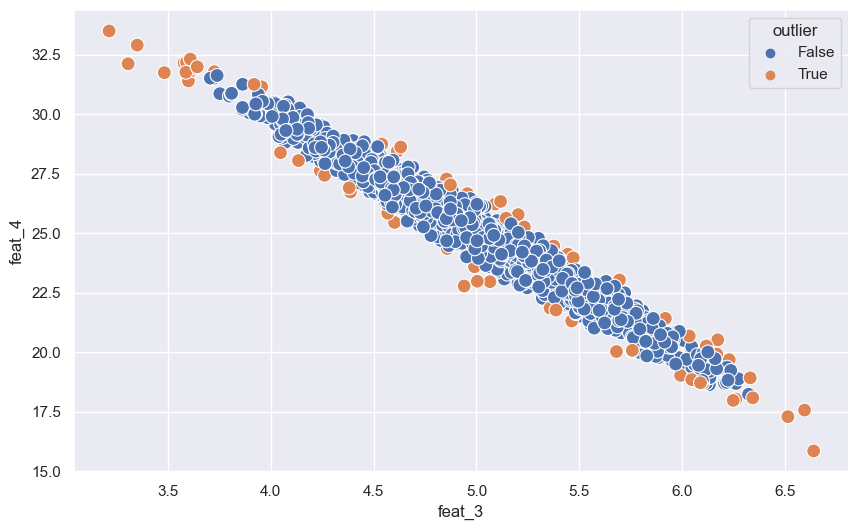

In [148]:
# Aplicando a rotina 
linhas3 = filter_multinorm(linhas3, ['feat_3', 'feat_4'])
 
sns.scatterplot(data=linhas3, x='feat_3', y='feat_4', hue="outlier", s=100)

In [149]:
linhas3.query("outlier == True")

feat_3     feat_4  outlier
32    4.858319  24.352386     True
38    5.091425  26.224085     True
119   5.992308  19.024466     True
125   4.955926  26.659603     True
142   4.241396  27.622058     True
...        ...        ...      ...
1753  5.004420  22.979585     True
1755  4.381461  26.904540     True
1758  5.757633  20.076970     True
1771  4.631795  28.618524     True
1792  4.873618  27.030629     True

[68 rows x 3 columns]

Anotando no dataframe <code>dados</code> no campo <code>oultier3</code>

In [150]:
linhas3['outlier3'] = linhas3['outlier']

dados = dados.merge(linhas3[['outlier3']], how='left', left_index=True, right_index=True)

In [151]:
dados.query("outlier3 == True")

area cod_localidade  escola_mais_proxima  farmacia_mais_proxima  \
32    129.0   LOCALIDADE 3          1168.077573            3977.952685   
38    132.0   LOCALIDADE 3                  NaN            1633.473006   
119   108.0   LOCALIDADE 3          3044.423639             651.220813   
125    91.0   LOCALIDADE 2          6821.221328            7512.181940   
142   162.0   LOCALIDADE 4          1805.213566            2780.020220   
...     ...            ...                  ...                    ...   
1753   98.0   LOCALIDADE 2          3988.904007            3265.985667   
1755  113.0   LOCALIDADE 1           714.932215            2234.562003   
1758  146.0   LOCALIDADE 2          2689.846612             622.852880   
1771  142.0   LOCALIDADE 1          2335.760884             651.970571   
1792  189.0   LOCALIDADE 3          1725.720086                    NaN   

        feat_1     feat_2    feat_3     feat_4  idade_imovel     loc_x  \
32    0.480254   7.023826  4.858319  24.352386          33.0  0.515254   
38    0.801949  12.209875  5.091425  26.224085          15.0  0.868252   
119   0.807716  11.686965  5.992308  19.024466          18.0  0.266960   
125   0.622718   9.669908  4.955926  26.659603           5.0  0.059433   
142   0.836901  12.850630  4.241396  27.622058          10.0  0.205838   
...        ...        ...       ...        ...           ...       ...   
1753  0.828896  12.633684  5.004420  22.979585          11.0  0.671374   
1755  0.626328   8.732805  4.381461  26.904540           5.0  0.557008   
1758  0.764257  11.885240  5.757633  20.076970           6.0  0.959122   
1771  0.852433  13.200504  4.631795  28.618524           8.0  0.384618   
1792  0.866503  13.203101  4.873618  27.030629          34.0  0.003800   

         loc_y  mercado_mais_proximo  num_penit_4km  num_penit_500m    preco  \
32    0.192295            806.437213            0.0             0.0  1387763   
38    0.032938           3335.357176            0.0             0.0  1381780   
119   0.800969           3063.867350            0.0             0.0  1677435   
125   0.166903            915.496517            0.0             0.0   663797   
142   0.757952           3899.868910            0.0             0.0  1290059   
...        ...                   ...            ...             ...      ...   
1753  0.049756                   NaN            0.0             0.0   799403   
1755  0.495954           2554.070117            0.0             0.0  1161261   
1758  0.318994           2443.991851            0.0             0.0   843251   
1771  0.585206           2029.153383            1.0             0.0  1096124   
1792  0.321733           4318.668698            0.0             0.0  1172726   

                   regiao    tipo  uf  outlier1 outlier3  
32         REGIAO SUDESTE  TIPO 1  SP      True     True  
38             REGIAO SUL  TIPO 2  SC     False     True  
119        REGIAO SUDESTE  TIPO 1  SP     False     True  
125   REGIAO CENTRO-OESTE  TIPO 1  MS     False     True  
142        REGIAO SUDESTE  TIPO 1  SP     False     True  
...                   ...     ...  ..       ...      ...  
1753       REGIAO SUDESTE  TIPO 1  SP     False     True  
1755         REGIAO NORTE  TIPO 1  AC     False     True  
1758           REGIAO SUL  TIPO 2  SC     False     True  
1771       REGIAO SUDESTE  TIPO 2  SP     False     True  
1792           REGIAO SUL  TIPO 2  PR     False     True  

[68 rows x 20 columns]

#### Identifique se existem outras variáveis do conjunto com outliers, e, caso existam, remova os outliers citando a natureza da variável e o método utilizado para identificação dos outliers;

Identificando linhas com algum valor nulo (anotando no campo <code>nulos</code>)

In [152]:
dados['nulos'] = dados.isna().any(axis=1)

print('Registros com algum valor nulo:', dados['nulos'].sum())

Registros com algum valor nulo: 246


#### Após finalizar as atividades citadas anteriormente, remova todos os dados faltantes ainda presentes no conjunto de dados;

Eliminando os outliers anotados nos campos <code>outlier1</code>, <code>outlier3</code> e <code>nulos</code>

In [153]:
dados['outlier1'].sum(), dados['outlier3'].sum(), dados['nulos'].sum()

(62, 68, 246)

In [154]:
dados.drop(dados.query("outlier1 | outlier3 | nulos").index, inplace=True)

dados['outlier1'].sum(), dados['outlier3'].sum(), dados['nulos'].sum()

(0, 0, 0)

Eliminando as colunas de apoio

In [155]:
dados.drop(columns=["outlier1", "outlier3", "nulos"], inplace=True)

#### Realize uma análise exploratória completa do conjunto de dados tratado;

In [156]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1848
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   1492 non-null   float64
 1   cod_localidade         1492 non-null   object 
 2   escola_mais_proxima    1492 non-null   float64
 3   farmacia_mais_proxima  1492 non-null   float64
 4   feat_1                 1492 non-null   float64
 5   feat_2                 1492 non-null   float64
 6   feat_3                 1492 non-null   float64
 7   feat_4                 1492 non-null   float64
 8   idade_imovel           1492 non-null   float64
 9   loc_x                  1492 non-null   float64
 10  loc_y                  1492 non-null   float64
 11  mercado_mais_proximo   1492 non-null   float64
 12  num_penit_4km          1492 non-null   float64
 13  num_penit_500m         1492 non-null   float64
 14  preco                  1492 non-null   int64  
 15  regi

#### **Analisando <code>area</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

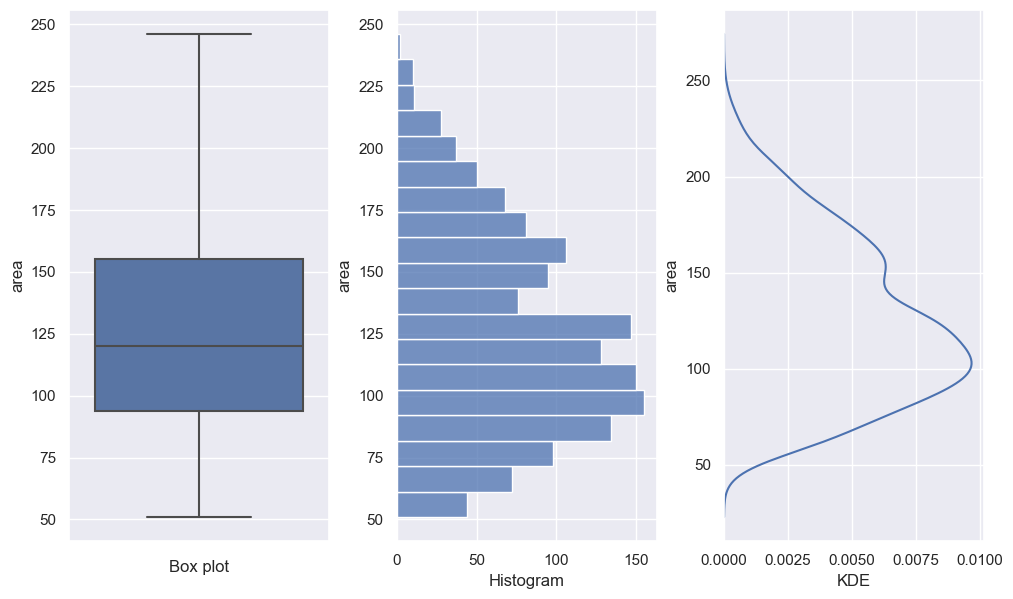

In [157]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="area", ax=axs[0])
sns.histplot(data=dados, y="area", ax=axs[1])
sns.kdeplot(data=dados, y="area", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

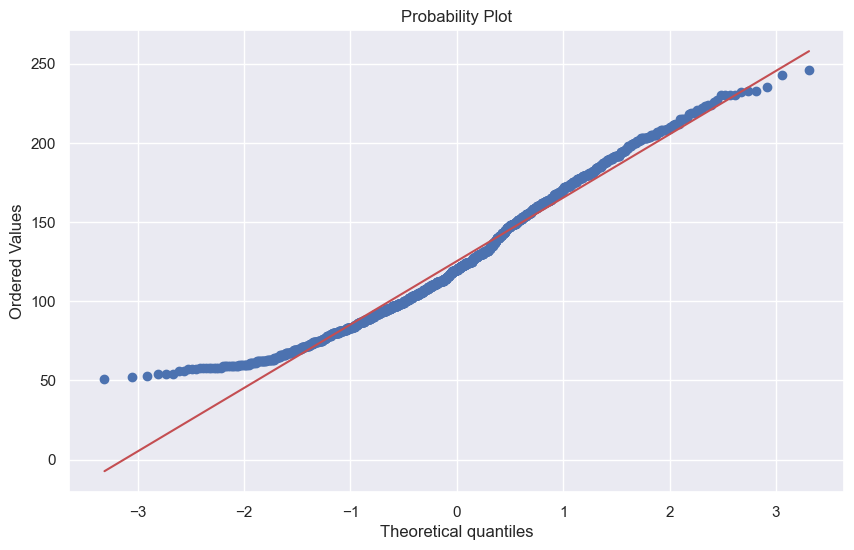

In [158]:
stats.probplot(dados["area"], dist="norm", plot=pylab)
pylab.show()

In [159]:
stats.shapiro(dados["area"])

ShapiroResult(statistic=0.9733109474182129, pvalue=5.249279167536449e-16)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>area</code> não é normal

#### **Analisando <code>cod_localidade</code>**

<AxesSubplot: ylabel='index'>

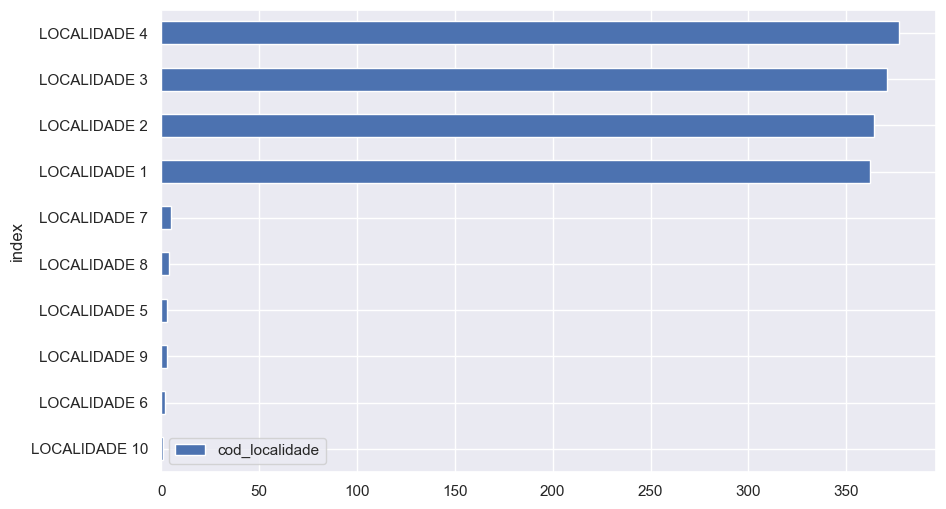

In [160]:
df_bar = dados["cod_localidade"].value_counts().reset_index()
df_bar.sort_values(by="cod_localidade", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

Conclusão: Localidades 7, 8, 5, 9, 6 e 10 são outliers.

#### **Analisando <code>escola_mais_proxima</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

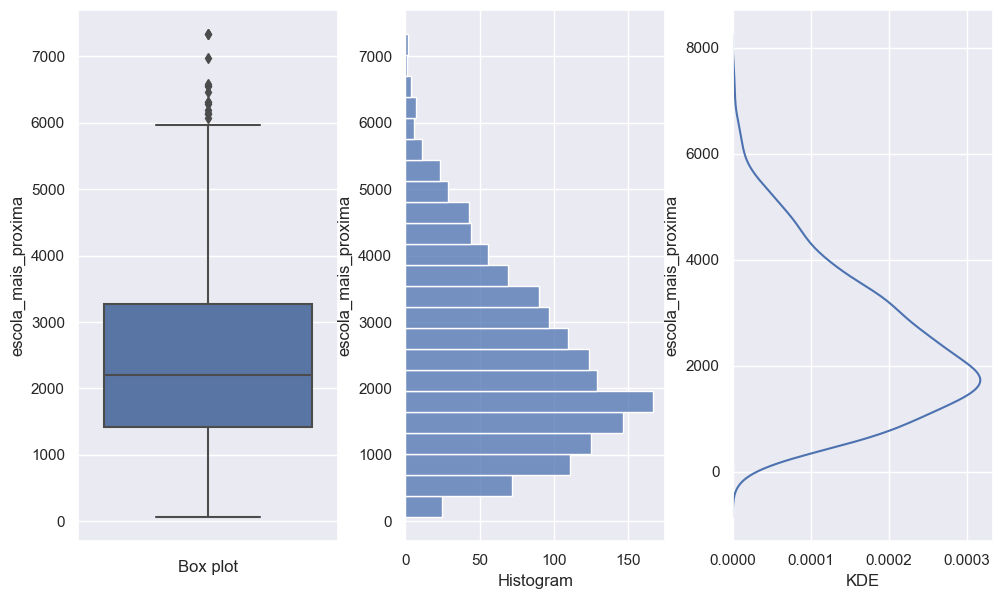

In [161]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="escola_mais_proxima", ax=axs[0])
sns.histplot(data=dados, y="escola_mais_proxima", ax=axs[1])
sns.kdeplot(data=dados, y="escola_mais_proxima", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")


Q-Q Plot e teste de normalidade

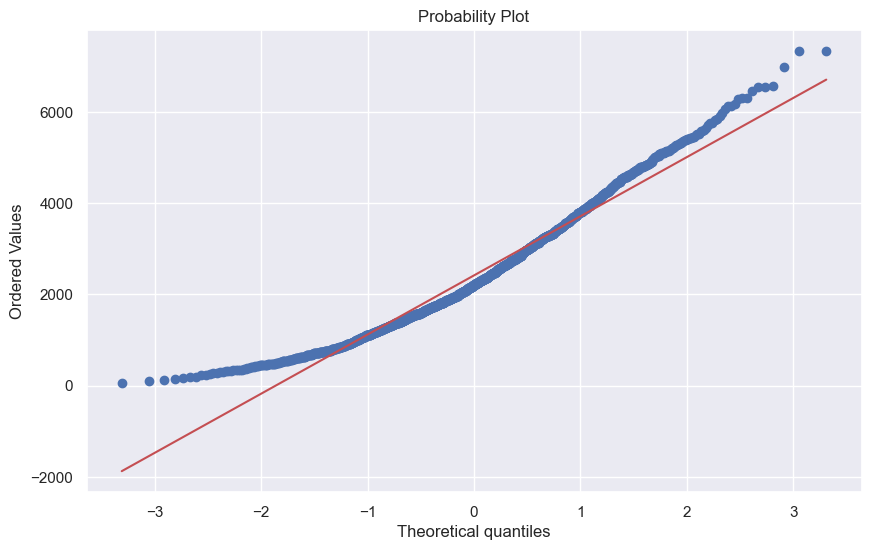

In [162]:
stats.probplot(dados["escola_mais_proxima"], dist="norm", plot=pylab)
pylab.show()

In [163]:
stats.shapiro(dados["escola_mais_proxima"])

ShapiroResult(statistic=0.9633514881134033, pvalue=5.787404310903292e-19)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>escola_mais_proxima</code> não é normal

#### **Analisando <code>farmacia_mais_proxima</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

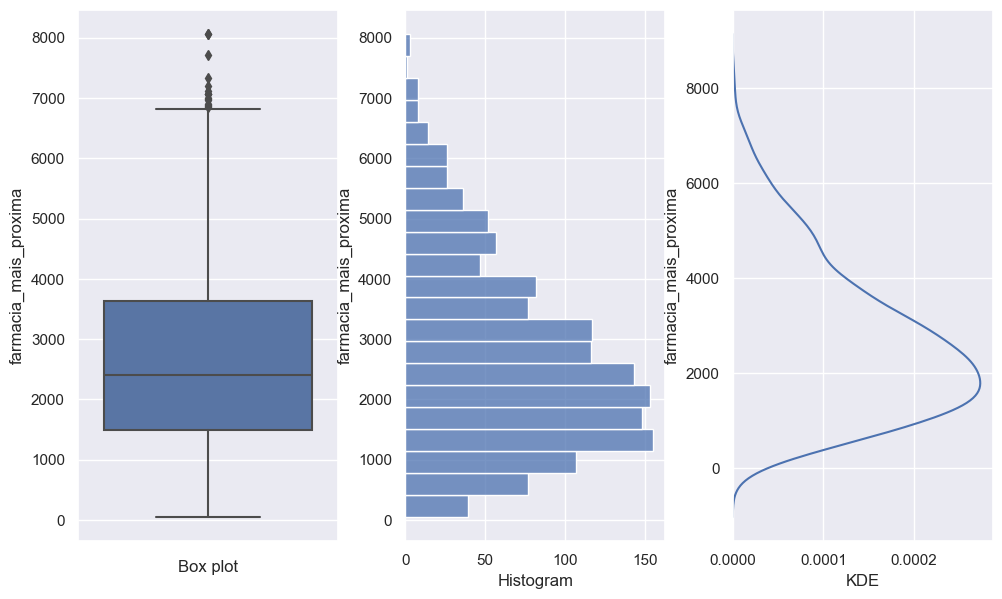

In [164]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="farmacia_mais_proxima", ax=axs[0])
sns.histplot(data=dados, y="farmacia_mais_proxima", ax=axs[1])
sns.kdeplot(data=dados, y="farmacia_mais_proxima", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")


Q-Q Plot e teste de normalidade

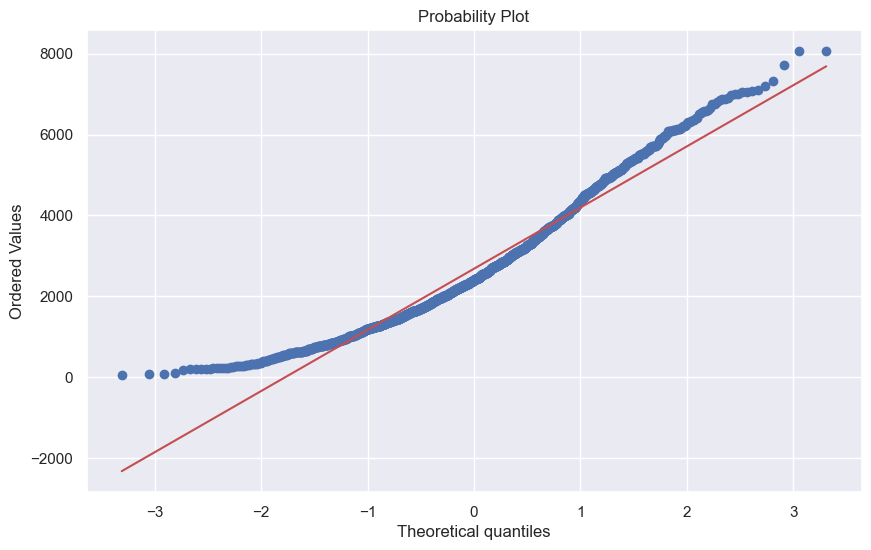

In [165]:
stats.probplot(dados["farmacia_mais_proxima"], dist="norm", plot=pylab)
pylab.show()

In [166]:
stats.shapiro(dados["farmacia_mais_proxima"])

ShapiroResult(statistic=0.9559159874916077, pvalue=8.199402780331311e-21)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>farmacia_mais_proxima</code> não é normal

#### **Analisando <code>feat_1</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

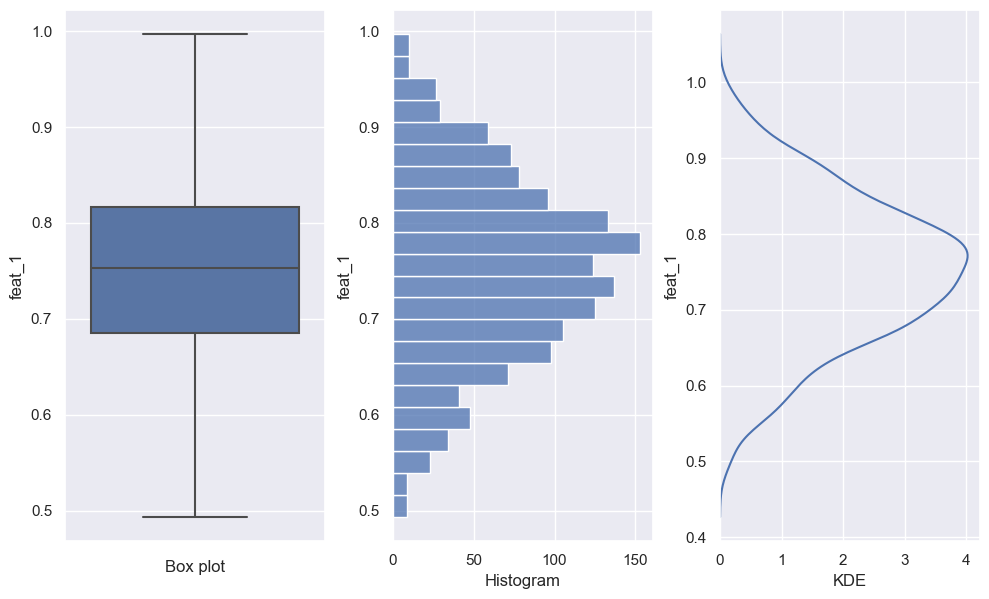

In [167]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="feat_1", ax=axs[0])
sns.histplot(data=dados, y="feat_1", ax=axs[1])
sns.kdeplot(data=dados, y="feat_1", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")


Q-Q Plot e teste de normalidade

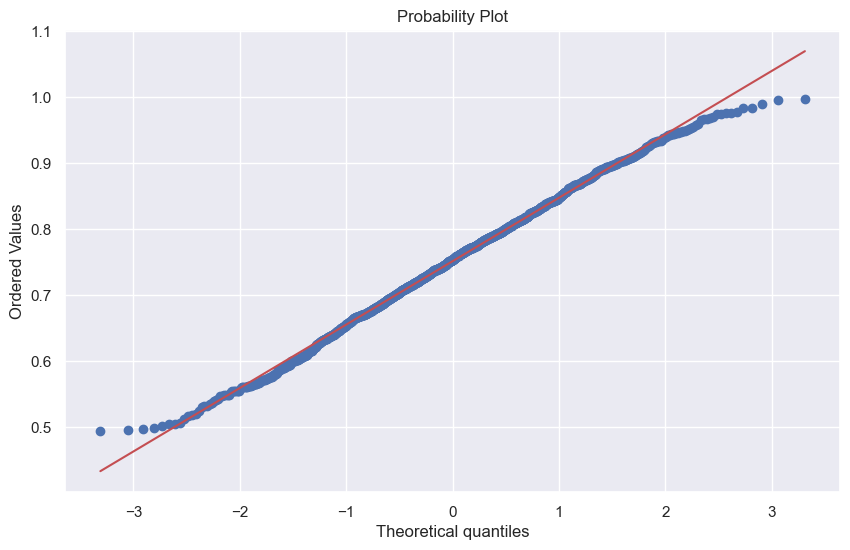

In [168]:
stats.probplot(dados["feat_1"], dist="norm", plot=pylab)
pylab.show()

In [169]:
stats.shapiro(dados["feat_1"])

ShapiroResult(statistic=0.9965912103652954, pvalue=0.002232607454061508)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>feat_1</code> não é normal

#### **Analisando <code>feat_2</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

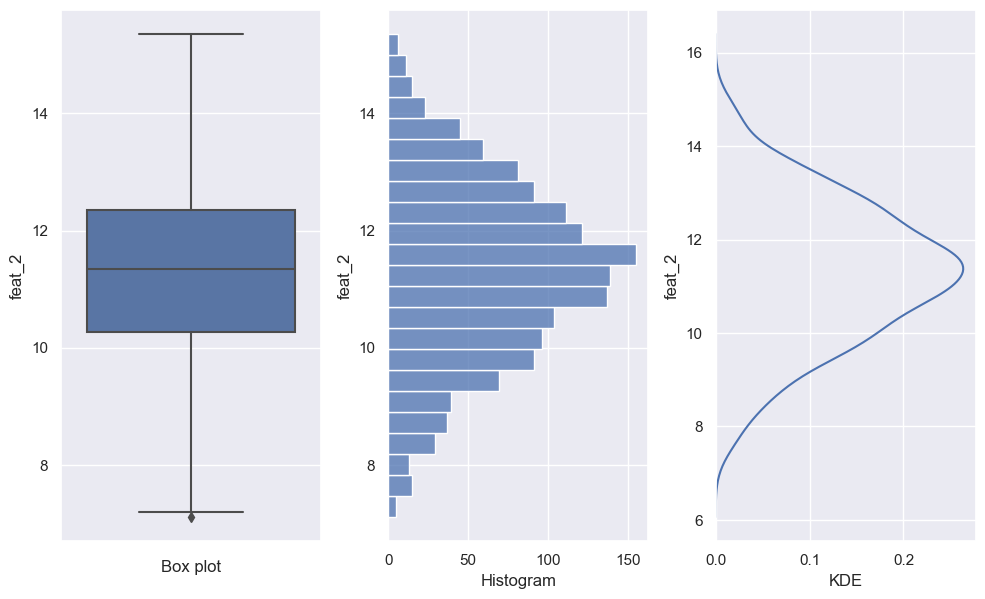

In [170]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="feat_2", ax=axs[0])
sns.histplot(data=dados, y="feat_2", ax=axs[1])
sns.kdeplot(data=dados, y="feat_2", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

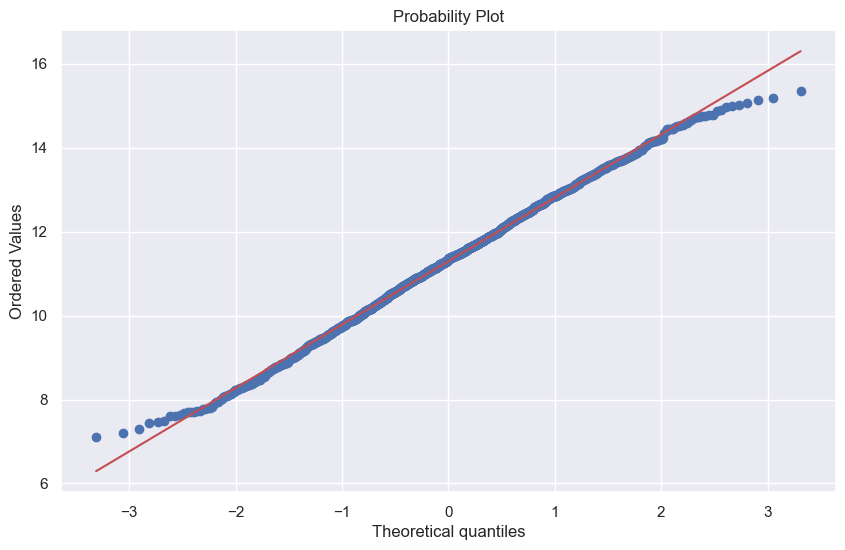

In [171]:
stats.probplot(dados["feat_2"], dist="norm", plot=pylab)
pylab.show()

In [172]:
stats.shapiro(dados["feat_2"])

ShapiroResult(statistic=0.9974256753921509, pvalue=0.0163052286952734)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>feat_2</code> não é normal

#### **Analisando <code>feat_3</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

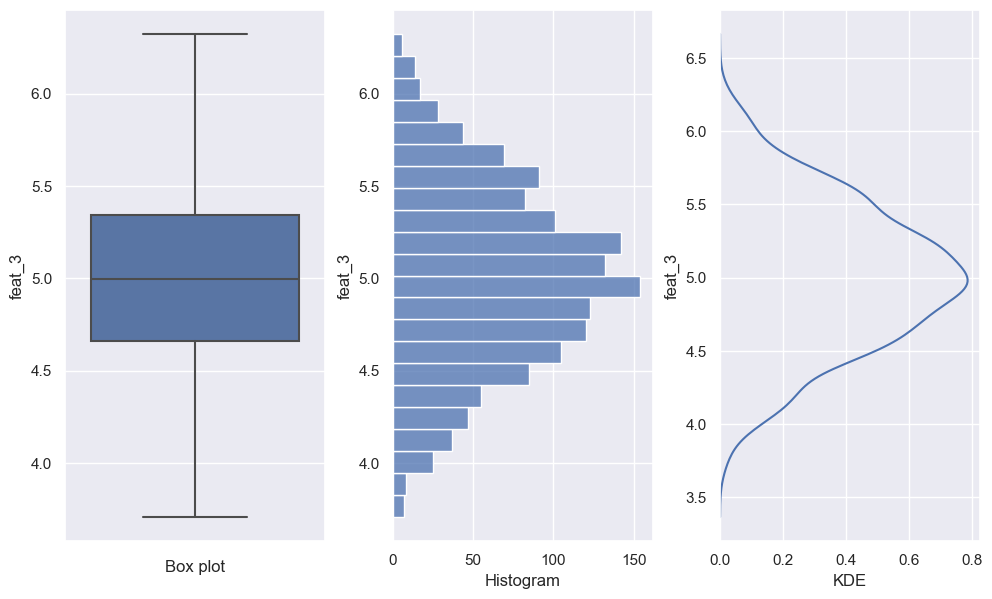

In [173]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="feat_3", ax=axs[0])
sns.histplot(data=dados, y="feat_3", ax=axs[1])
sns.kdeplot(data=dados, y="feat_3", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

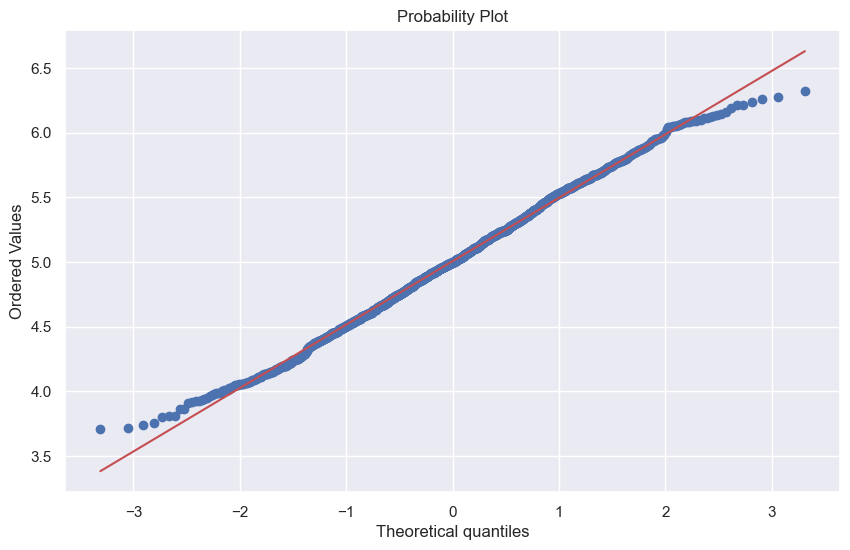

In [174]:
stats.probplot(dados["feat_3"], dist="norm", plot=pylab)
pylab.show()

In [175]:
stats.shapiro(dados["feat_3"])

ShapiroResult(statistic=0.9967371821403503, pvalue=0.003136285813525319)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>feat_3</code> não é normal

#### **Analisando <code>feat_4</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

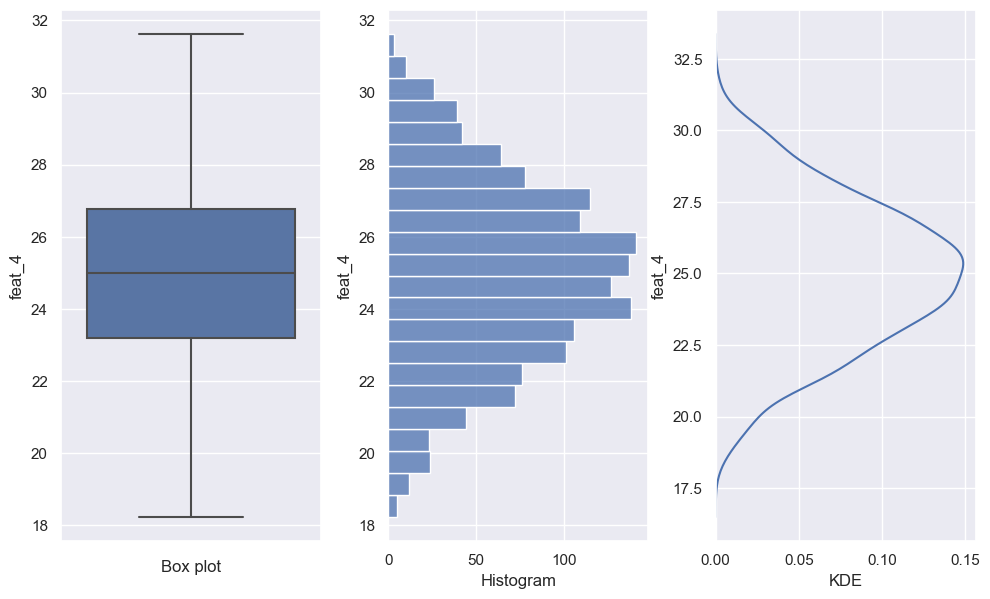

In [176]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="feat_4", ax=axs[0])
sns.histplot(data=dados, y="feat_4", ax=axs[1])
sns.kdeplot(data=dados, y="feat_4", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")


Q-Q Plot e teste de normalidade

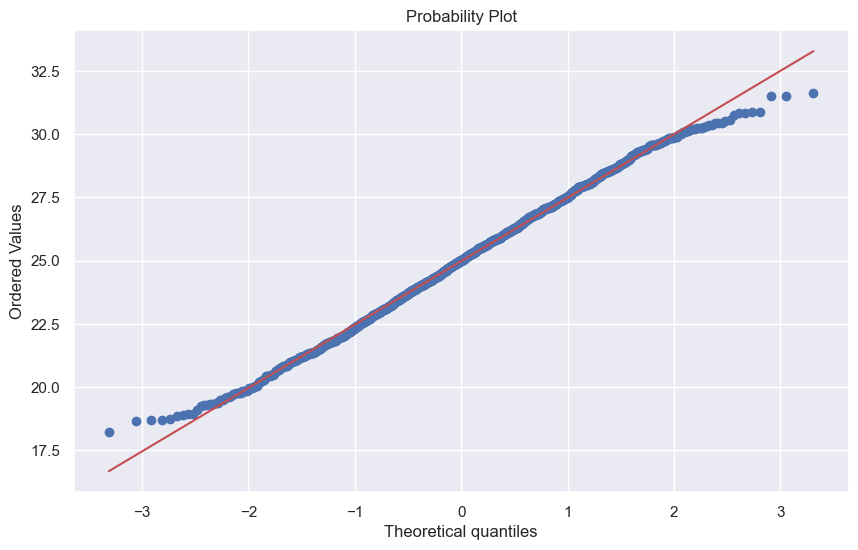

In [177]:
stats.probplot(dados["feat_4"], dist="norm", plot=pylab)
pylab.show()

In [178]:
stats.shapiro(dados["feat_4"])

ShapiroResult(statistic=0.9964338541030884, pvalue=0.0015540189342573285)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>feat_4</code> não é normal

#### **Analisando <code>idade_imovel</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

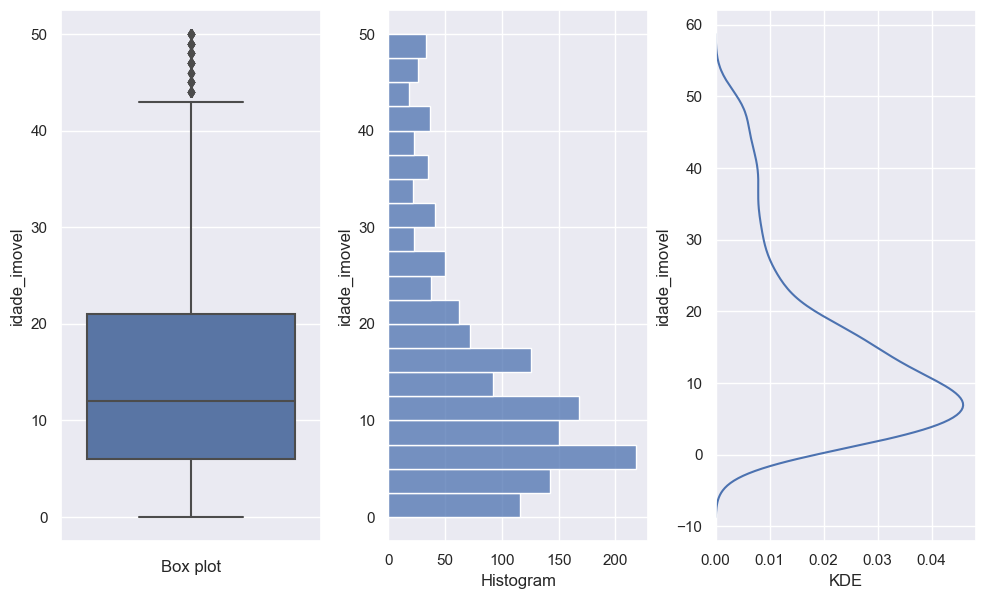

In [179]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="idade_imovel", ax=axs[0])
sns.histplot(data=dados, y="idade_imovel", ax=axs[1])
sns.kdeplot(data=dados, y="idade_imovel", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

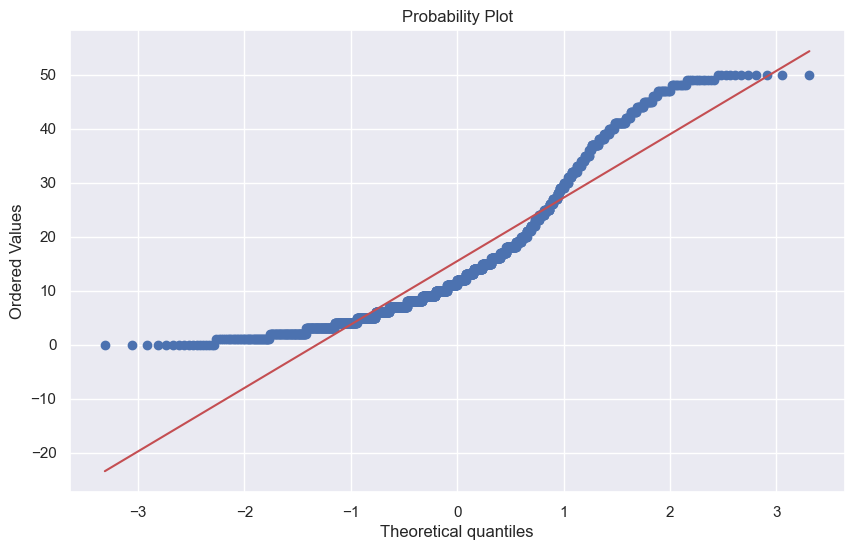

In [180]:
stats.probplot(dados["idade_imovel"], dist="norm", plot=pylab)
pylab.show()

In [181]:
stats.shapiro(dados["idade_imovel"])

ShapiroResult(statistic=0.8788319826126099, pvalue=1.409401416651805e-32)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>idade_imovel</code> não é normal

#### **Analisando <code>loc_x</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

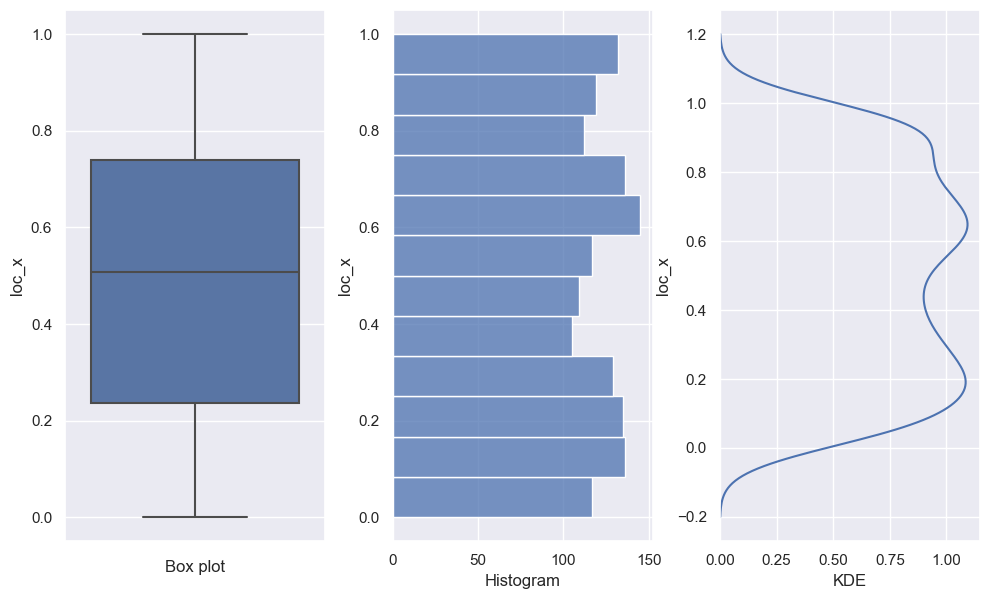

In [182]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="loc_x", ax=axs[0])
sns.histplot(data=dados, y="loc_x", ax=axs[1])
sns.kdeplot(data=dados, y="loc_x", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

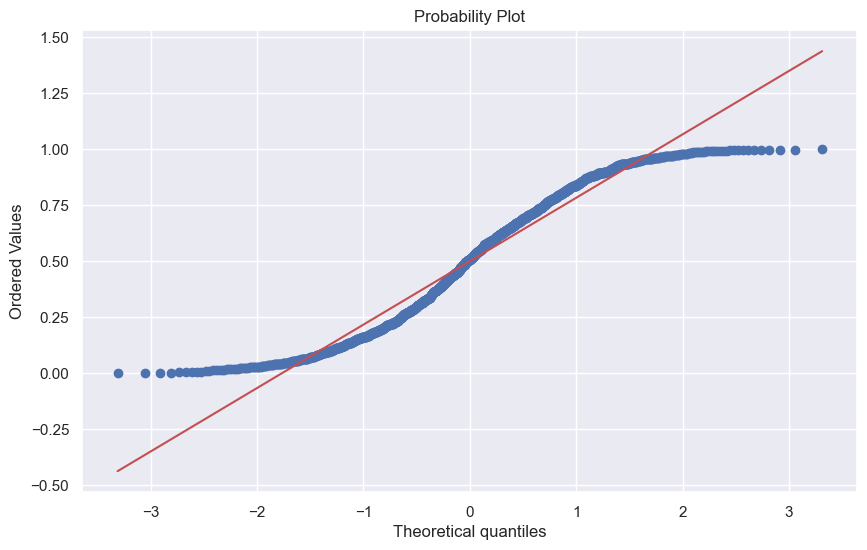

In [183]:
stats.probplot(dados["loc_x"], dist="norm", plot=pylab)
pylab.show()

In [184]:
stats.shapiro(dados["loc_x"])

ShapiroResult(statistic=0.9522740840911865, pvalue=1.2327735605683812e-21)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>loc_x</code> não é normal

#### **Analisando <code>loc_y</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

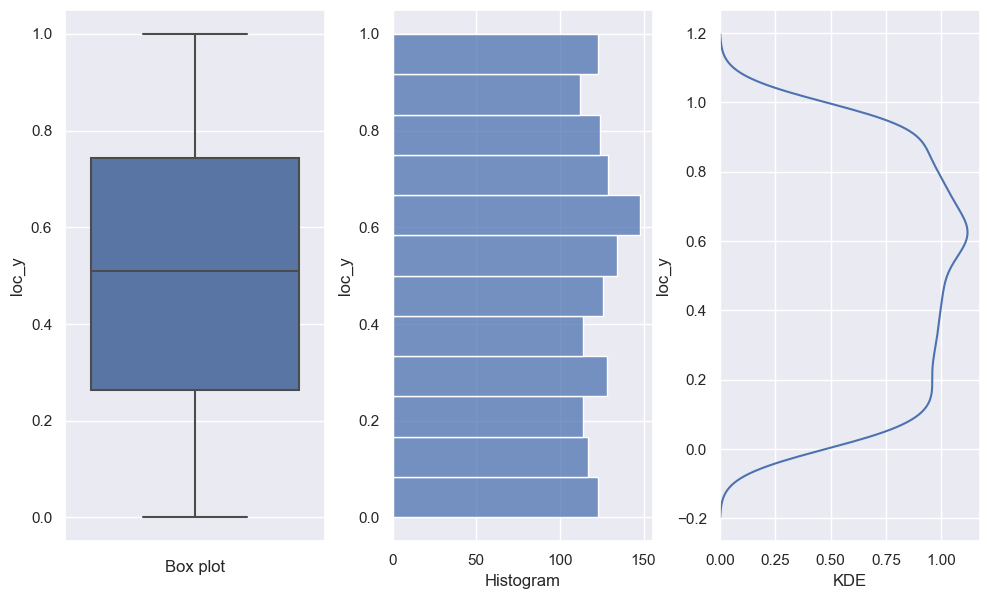

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="loc_y", ax=axs[0])
sns.histplot(data=dados, y="loc_y", ax=axs[1])
sns.kdeplot(data=dados, y="loc_y", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

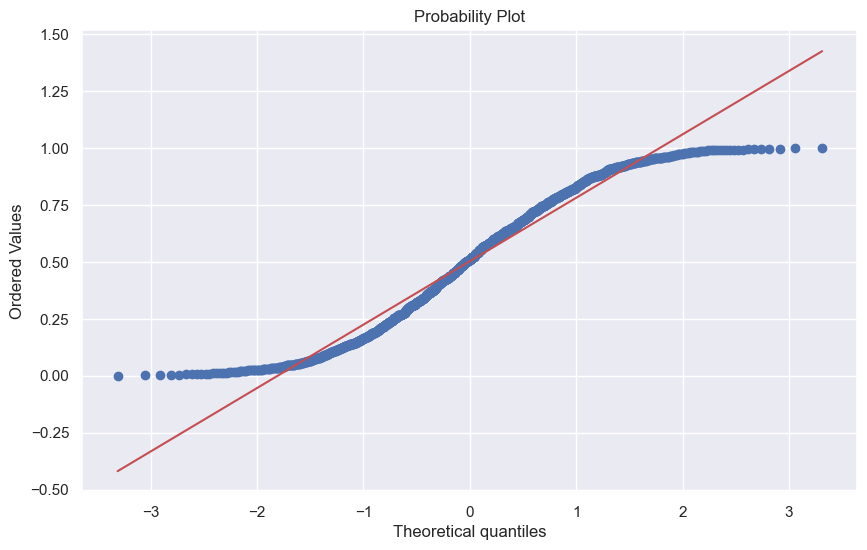

In [186]:
stats.probplot(dados["loc_y"], dist="norm", plot=pylab)
pylab.show()

In [187]:
stats.shapiro(dados["loc_y"])

ShapiroResult(statistic=0.9588567018508911, pvalue=4.1260331178467615e-20)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>loc_y</code> não é normal

#### **Analisando <code>num_penit_4km</code>**

<AxesSubplot: ylabel='index'>

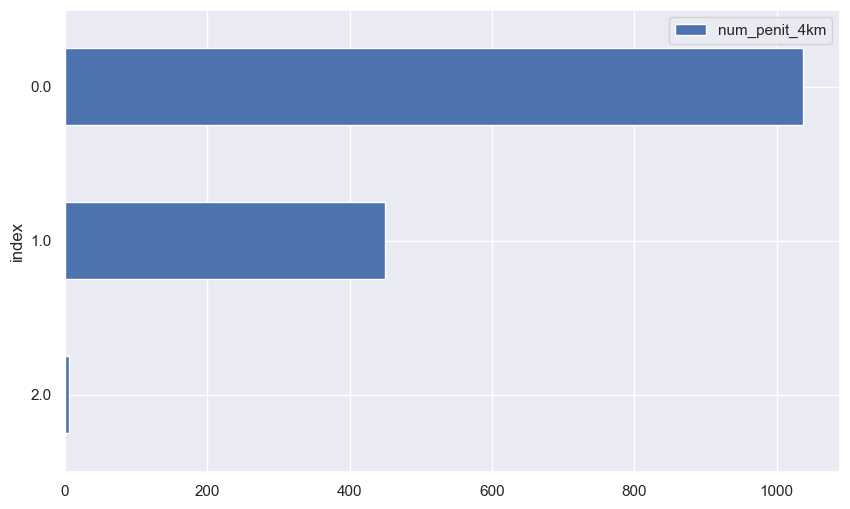

In [188]:
df_bar = dados["num_penit_4km"].value_counts().reset_index()
df_bar.sort_values(by="num_penit_4km", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

Conclusão: Campo <code>num_penit_4km</code> é campo categórico.

#### **Analisando <code>,num_penit_500m</code>**

<AxesSubplot: ylabel='index'>

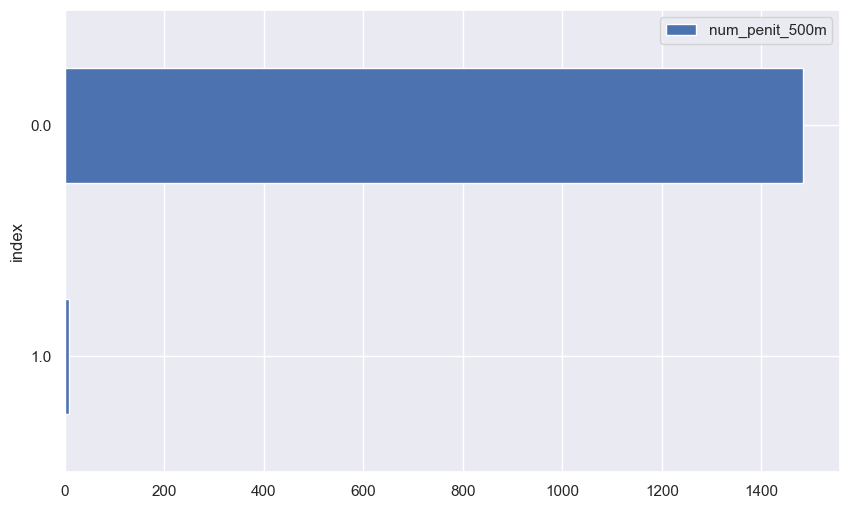

In [189]:
df_bar = dados["num_penit_500m"].value_counts().reset_index()
df_bar.sort_values(by="num_penit_500m", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

Conclusão: Campo <code>num_penit_500m</code> é campo categórico.

#### **Analisando <code>preco</code>**

Gráficos de distribuição

Text(0.5, 33.249999999999986, 'KDE')

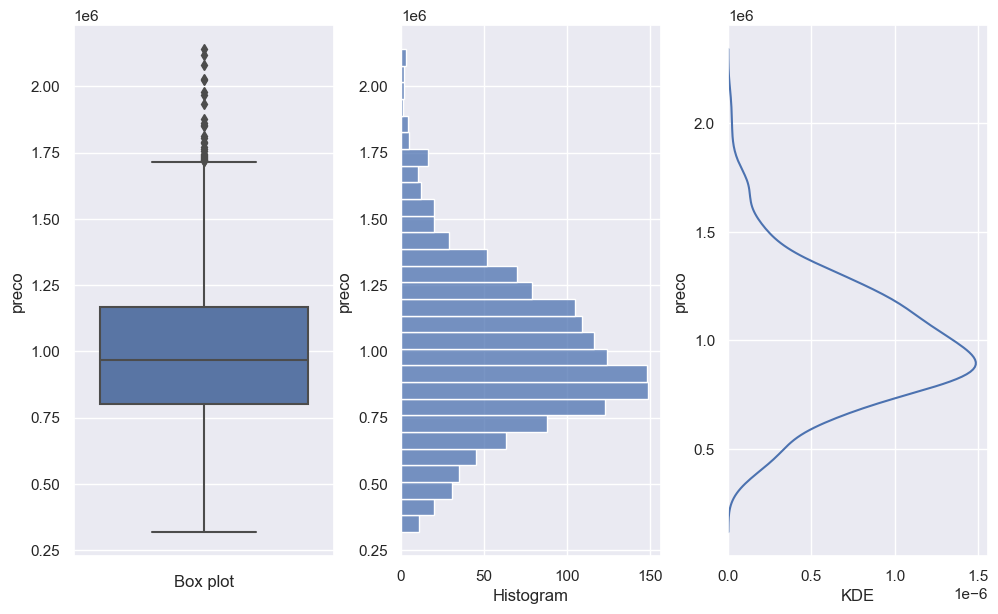

In [190]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.tight_layout()

sns.boxplot(data=dados, y="preco", ax=axs[0])
sns.histplot(data=dados, y="preco", ax=axs[1])
sns.kdeplot(data=dados, y="preco", ax=axs[2])
axs[0].set_xlabel("Box plot")
axs[1].set_xlabel("Histogram")
axs[2].set_xlabel("KDE")

Q-Q Plot e teste de normalidade

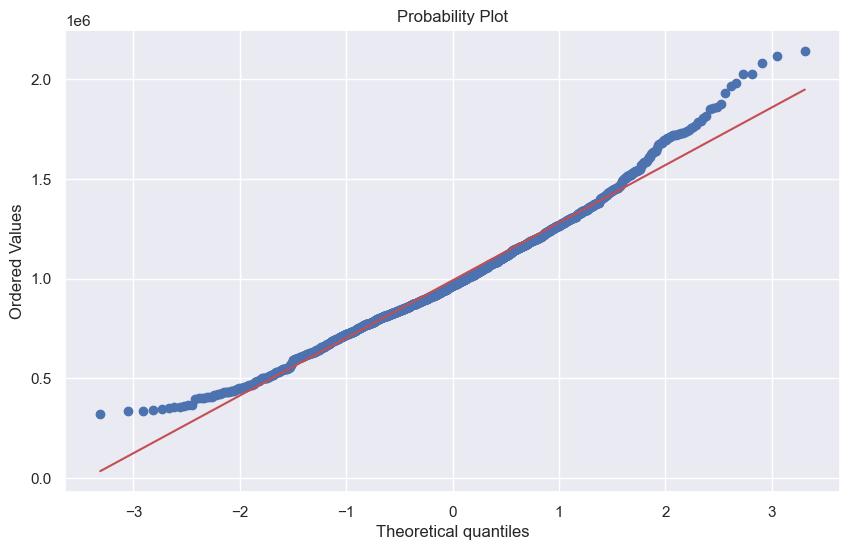

In [191]:
stats.probplot(dados["preco"], dist="norm", plot=pylab)
pylab.show()

In [192]:
stats.shapiro(dados["preco"])

ShapiroResult(statistic=0.9839827418327332, pvalue=8.125532365010901e-12)

Conclusão: p-value < 0.05, hipótese nula rejeitada, a distribuição de <code>preco</code> não é normal


#### **Analisando <code>tipo</code>**

<AxesSubplot: ylabel='index'>

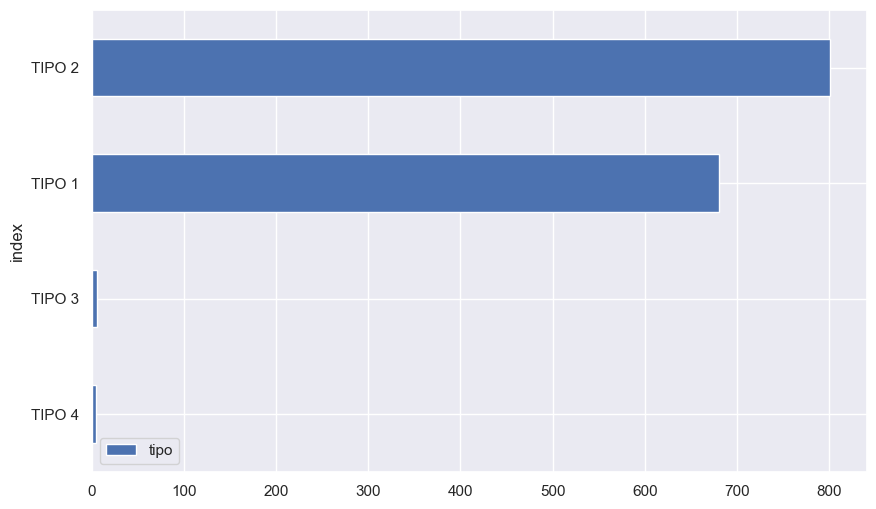

In [193]:
df_bar = dados["tipo"].value_counts().reset_index()
df_bar.sort_values(by="tipo", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

Conclusão: Tipos 3 e 4 são outliers.

#### **Analisando <code>uf</code>**

<AxesSubplot: ylabel='index'>

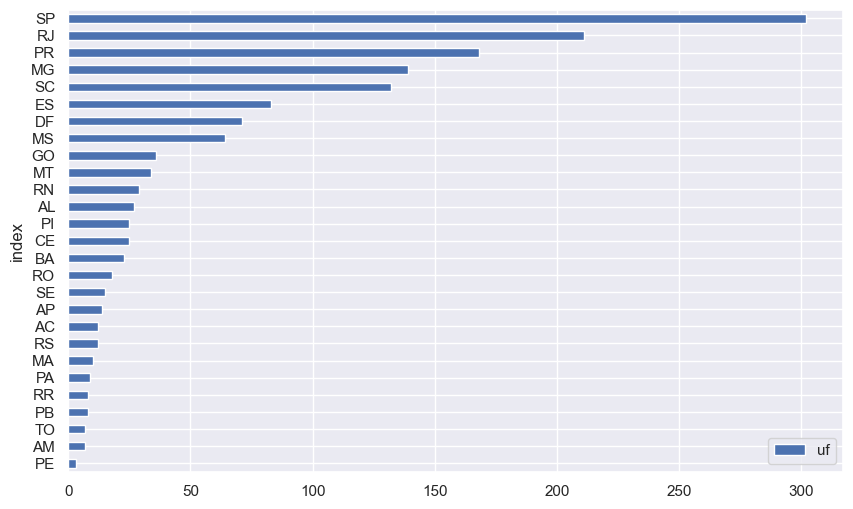

In [194]:
df_bar = dados["uf"].value_counts().reset_index()
df_bar.sort_values(by="uf", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

Conclusão: Hipótese de que estados da região Norte e Nordeste são outliers. Podem ser juntados em regiões para maior representatividade.

#### **Analisando <code>regiao</code>**

<AxesSubplot: ylabel='index'>

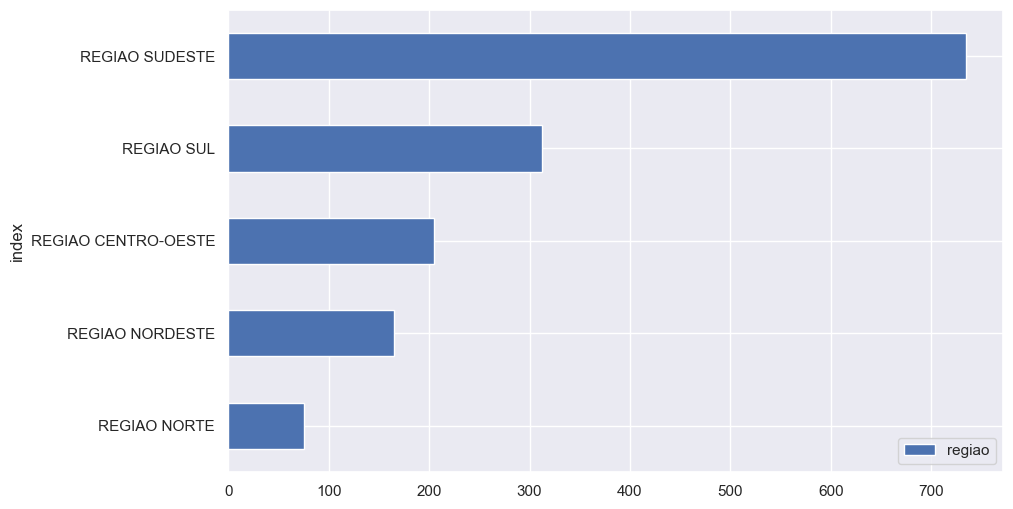

In [195]:
df_bar = dados["regiao"].value_counts().reset_index()
df_bar.sort_values(by="regiao", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

<AxesSubplot: ylabel='index'>

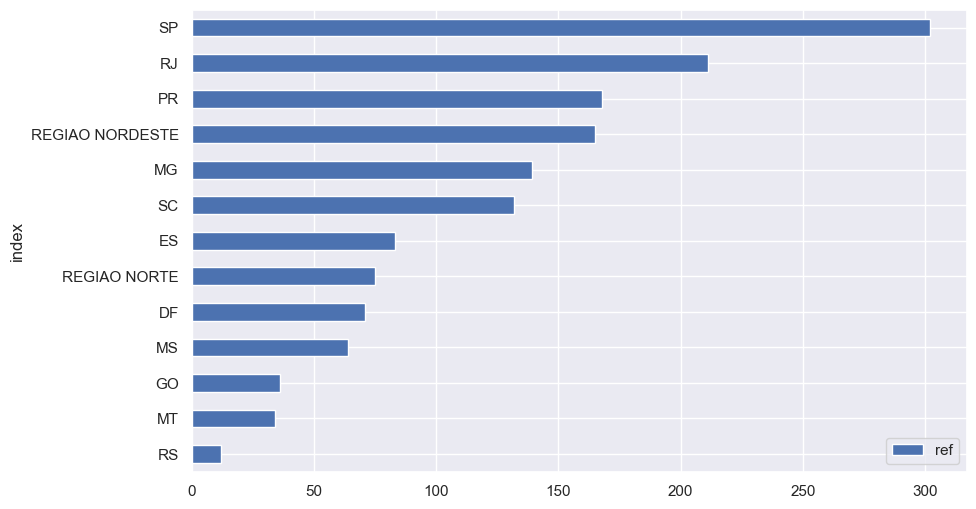

In [196]:
def select_ref(linha):
    match linha["regiao"]:
        case "REGIAO NORTE":
            return linha["regiao"]
        case "REGIAO NORDESTE":
            return linha["regiao"]
        case default:
            return linha["uf"]

dados_uf = dados[['regiao', 'uf']].reset_index()
dados_uf['ref'] = dados_uf.apply(select_ref, axis=1)

df_bar = dados_uf["ref"].value_counts().reset_index()
df_bar.sort_values(by="ref", ascending=True, inplace=True)
df_bar.plot.barh(x = "index")

Conclusão: Se juntarmos registros da região Norte e Nordeste, apresentarão uma representatividade maior nas análises posteriores.

#### **Análises de correlação entre as variáveis**

Análise de pair plot entre as variáveis numéricas

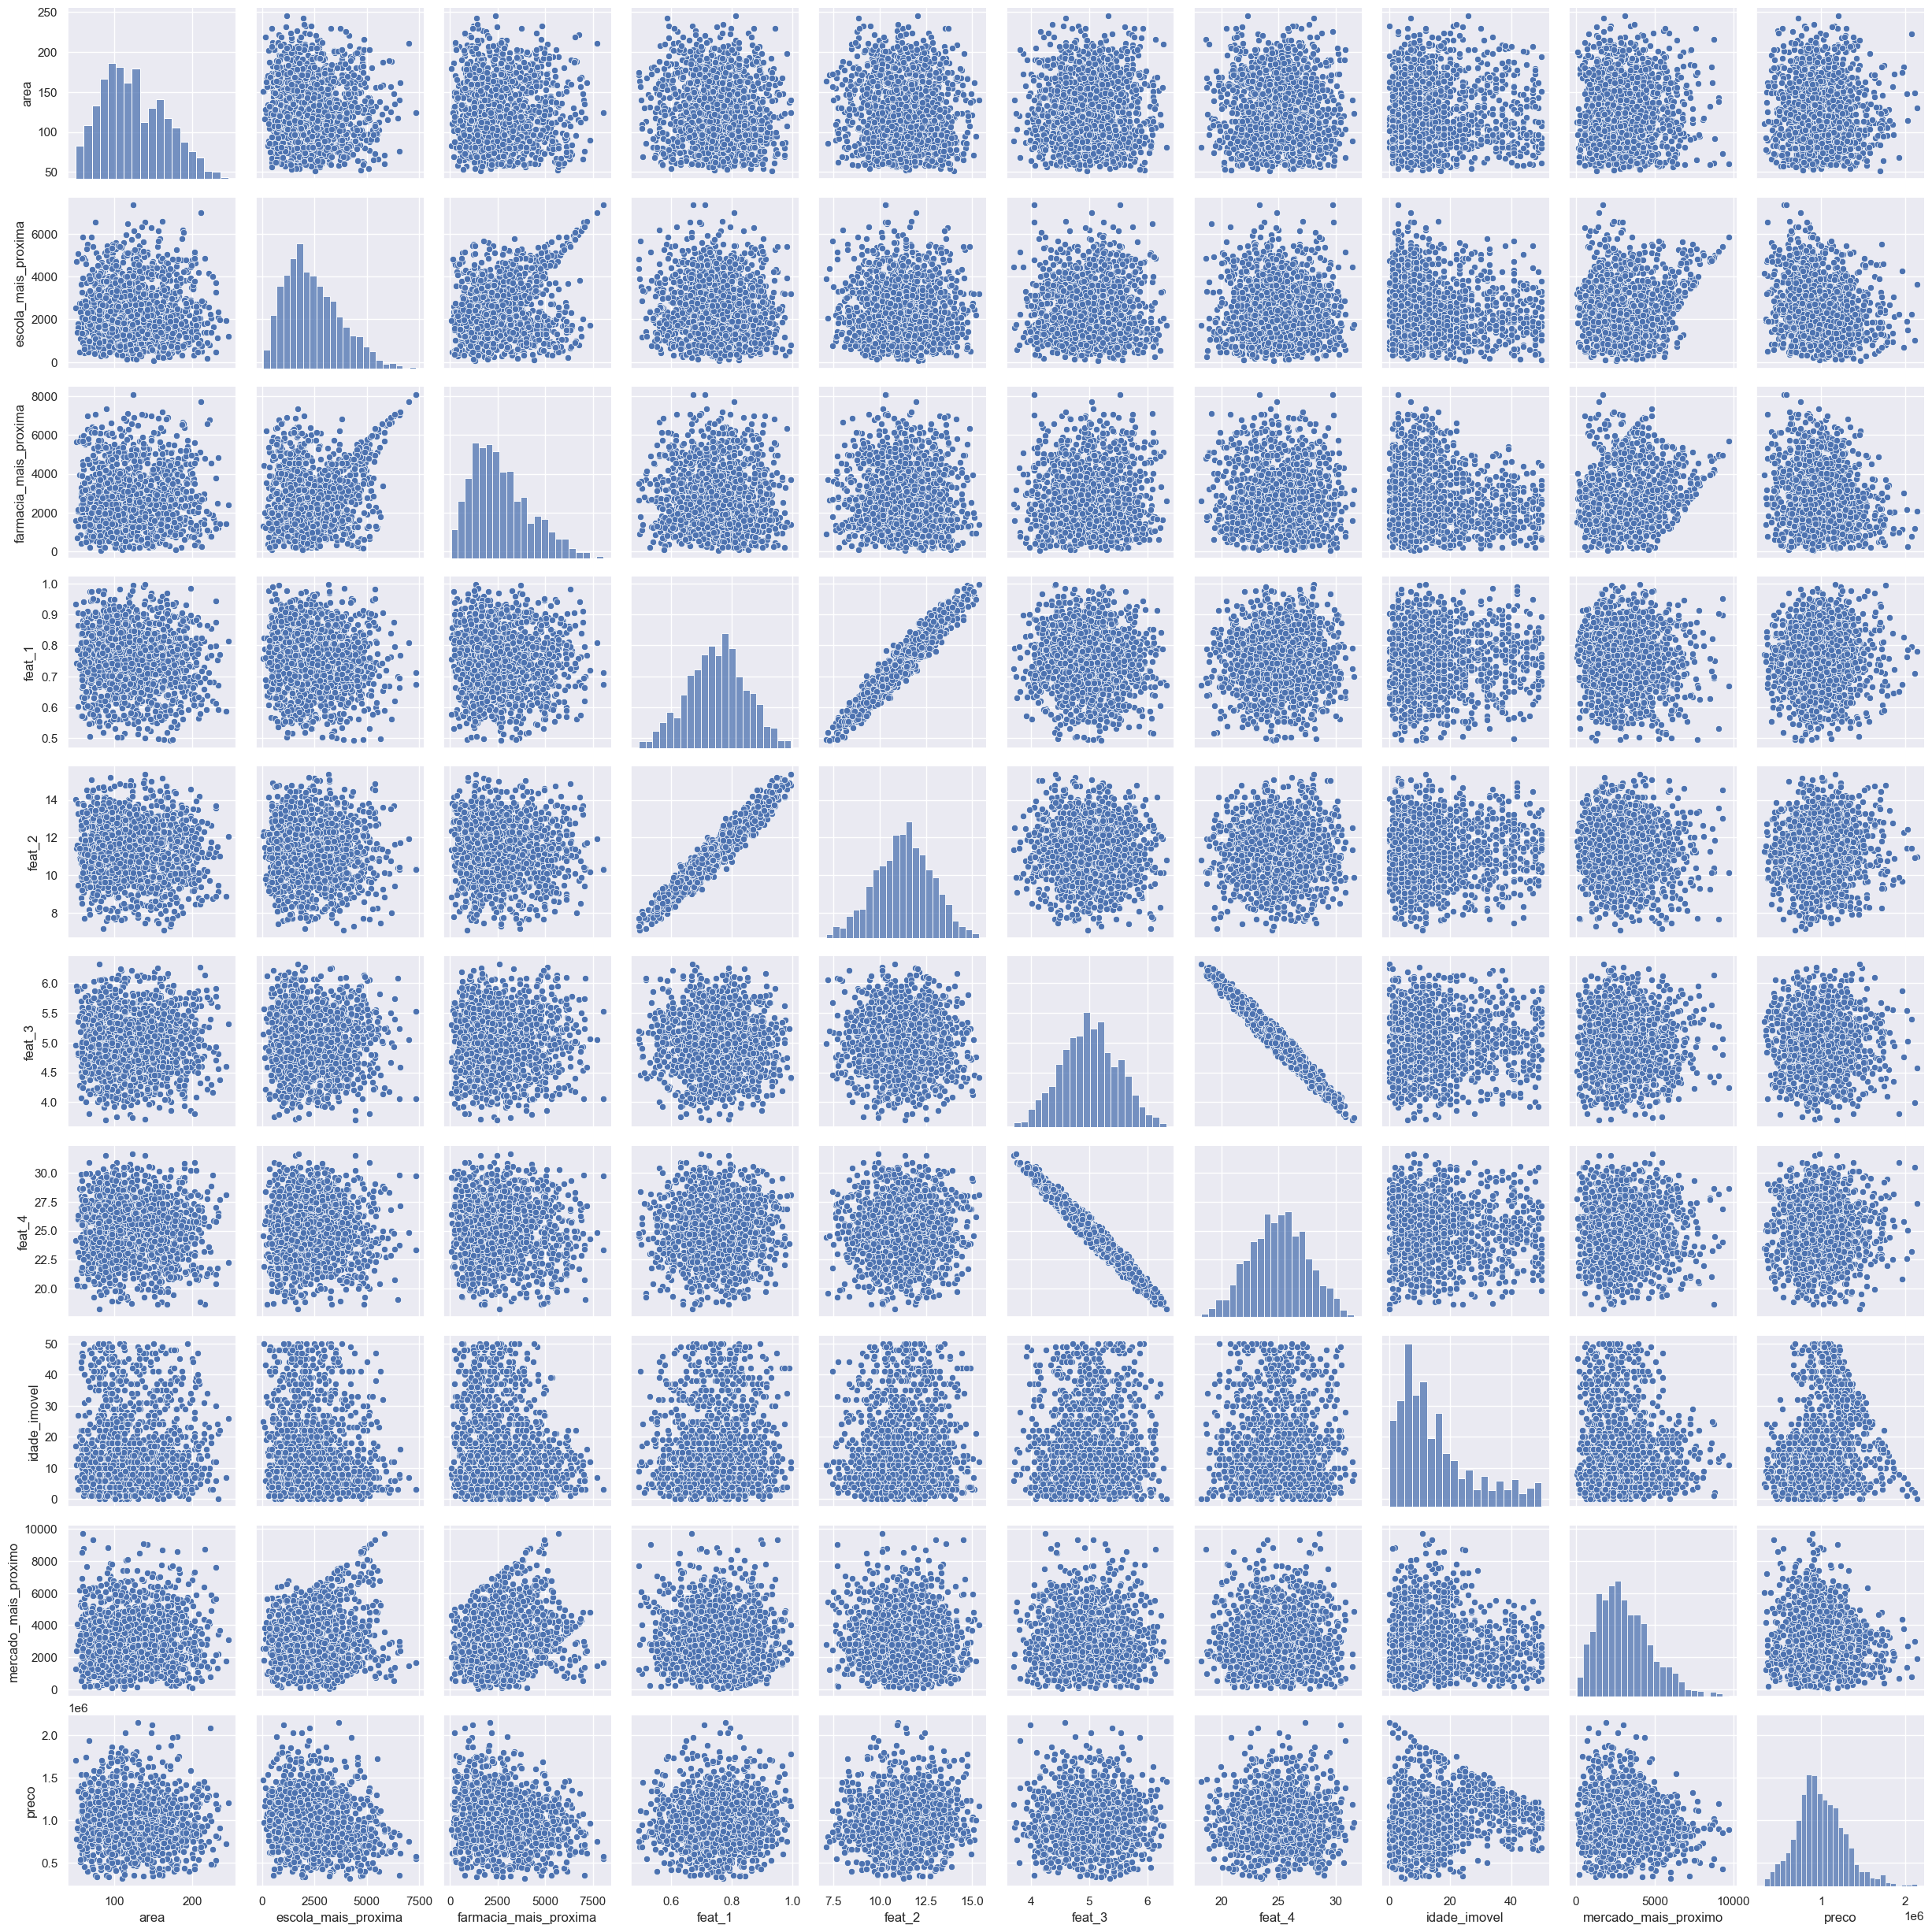

In [197]:
sns.pairplot(
    dados.drop(columns=["loc_x", "loc_y", "num_penit_4km", "num_penit_500m"])
)

<AxesSubplot: >

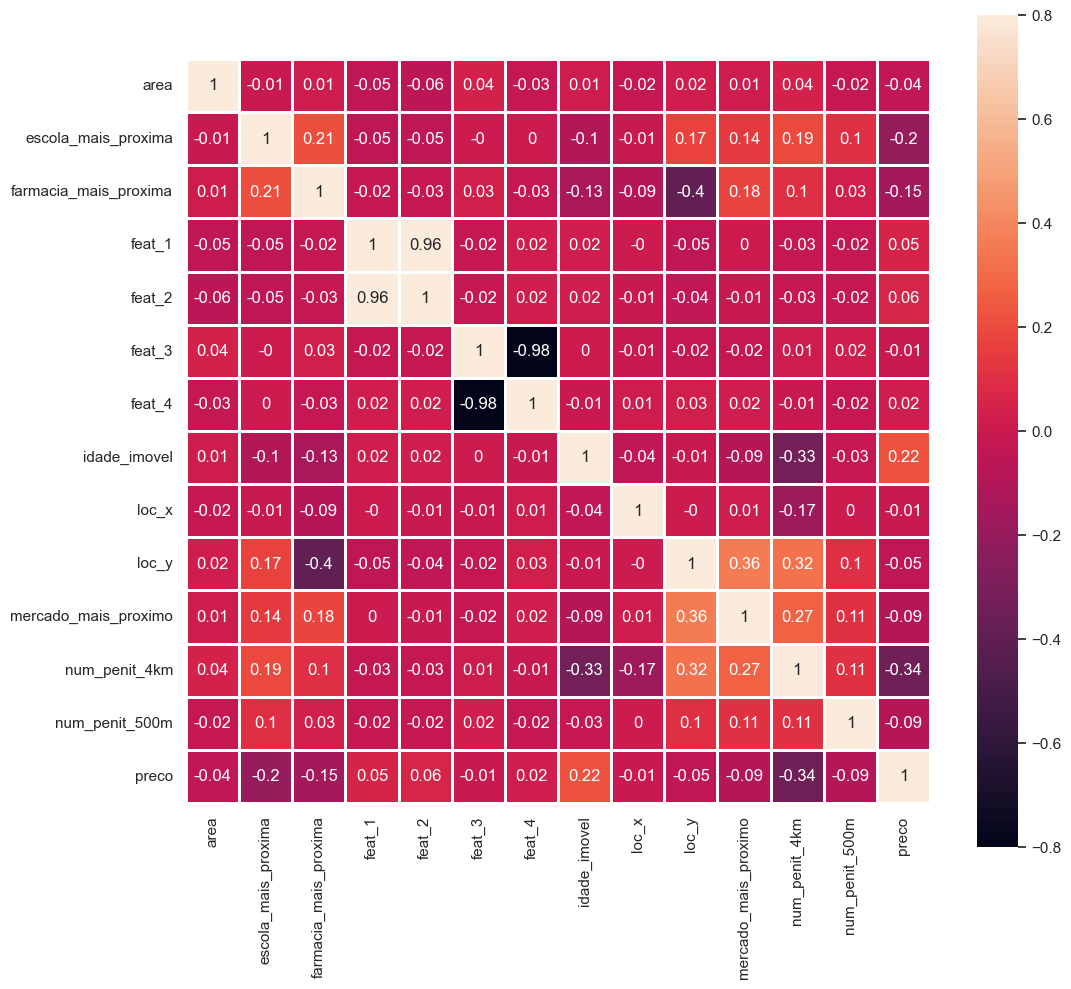

In [198]:
corr = dados.select_dtypes(exclude="object").corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, 
            annot=True,
            square=True, 
            vmax=.8,
            vmin=-.8,
            linewidths=2, 
            cbar_kws={"shrink": .9})

Conclusão: 
* Principais observações:
  * <code>feat_1</code> e <code>feat_2</code> : Correlação positiva muito forte
  * <code>feat_3</code> e <code>feat_3</code> : Correlação negativa muito forte
  * <code>loc_y</code> e <code>farmacia_mais_proxima</code> : Correlação negativa moderada
  * <code>loc_y</code> e <code>mercado_mais_proximo</code> : Correlação negativa fraca
  * <code>loc_y</code> e <code>num_penit_4km</code> : Correlação negativa fraca
  * <code>preco</code> e <code>num_penit_4km</code> : Correlação negativa fraca
  * <code>preco</code> e <code>idade_imovel</code> : Correlação negativa fraca
  * <code>idade_imovel</code> e <code>num_penit_4km</code> : Correlação negativa fraca
  * <code>escola_mais_proxima</code> e <code>farmacia_mais_proxima</code> : Correlação positiva fraca

#### Salve o arquivo final em formato **parquet** com o nome *dados_tratados.parquet*;

In [199]:
dados.to_parquet("dados_tratados.parquet")